In [308]:
# Here we will use these features to combine our dataset
# It is based the background knowledge 
# The description of the data is in the attached file

In [ ]:
# TARGET QUESTIONS 
'Q121','Q122','Q123', 'Q124', 'Q125', 'Q126', 'Q127', 'Q128', 'Q129', 'Q130'

In [ ]:
# PERSONAL DATA
'Q260', 'Q262', 'Q263','Q264', 'Q265', 'Q269', 'Q270', 'Q271', 
'Q273', 'Q274', 'Q275','Q279', 'Q290'

In [ ]:
# TRUST
'Q21','Q57','Q59', 'Q61', 'Q62', 'Q63'

In [ ]:
# SECURE
'Q131','Q132','Q133','Q134','Q135','Q136','Q137','Q138','Q142'

In [ ]:
# REIGION
'Q6','Q164','Q171','Q172','Q173','Q289'

In [ ]:
# MORALITY
'Q176', 'Q177','Q178', 'Q179', 'Q180', 'Q181', 'Q182', 'Q183', 'Q184',
'Q185', 'Q186','Q187', 'Q188', 'Q189', 'Q190', 'Q191', 'Q192', 'Q193', 
'Q194', 'Q195'

In [ ]:
# POLITICS
'Q199', 'Q200', 'Q209', 'Q210', 'Q211', 'Q212', 'Q213', 'Q214', 'Q215',
'Q216', 'Q217', 'Q218', 'Q219', 'Q220',

In [ ]:
# ECONOMICS
'Q5','Q50','Q109','Q110','Q142','Q287','Q288'

In [ ]:
# HAPPY
'Q46', 'Q47', 'Q49'

In [1]:
# Import necessay libraries 
import pandas as pd
import numpy as np
import random as rnd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the dataset
df = pd.read_csv('WVS7.csv',low_memory=False)

In [3]:
# Now we focus on situation in China
df_cn = df[(df['B_COUNTRY_ALPHA'] == "USA")]

<AxesSubplot: >

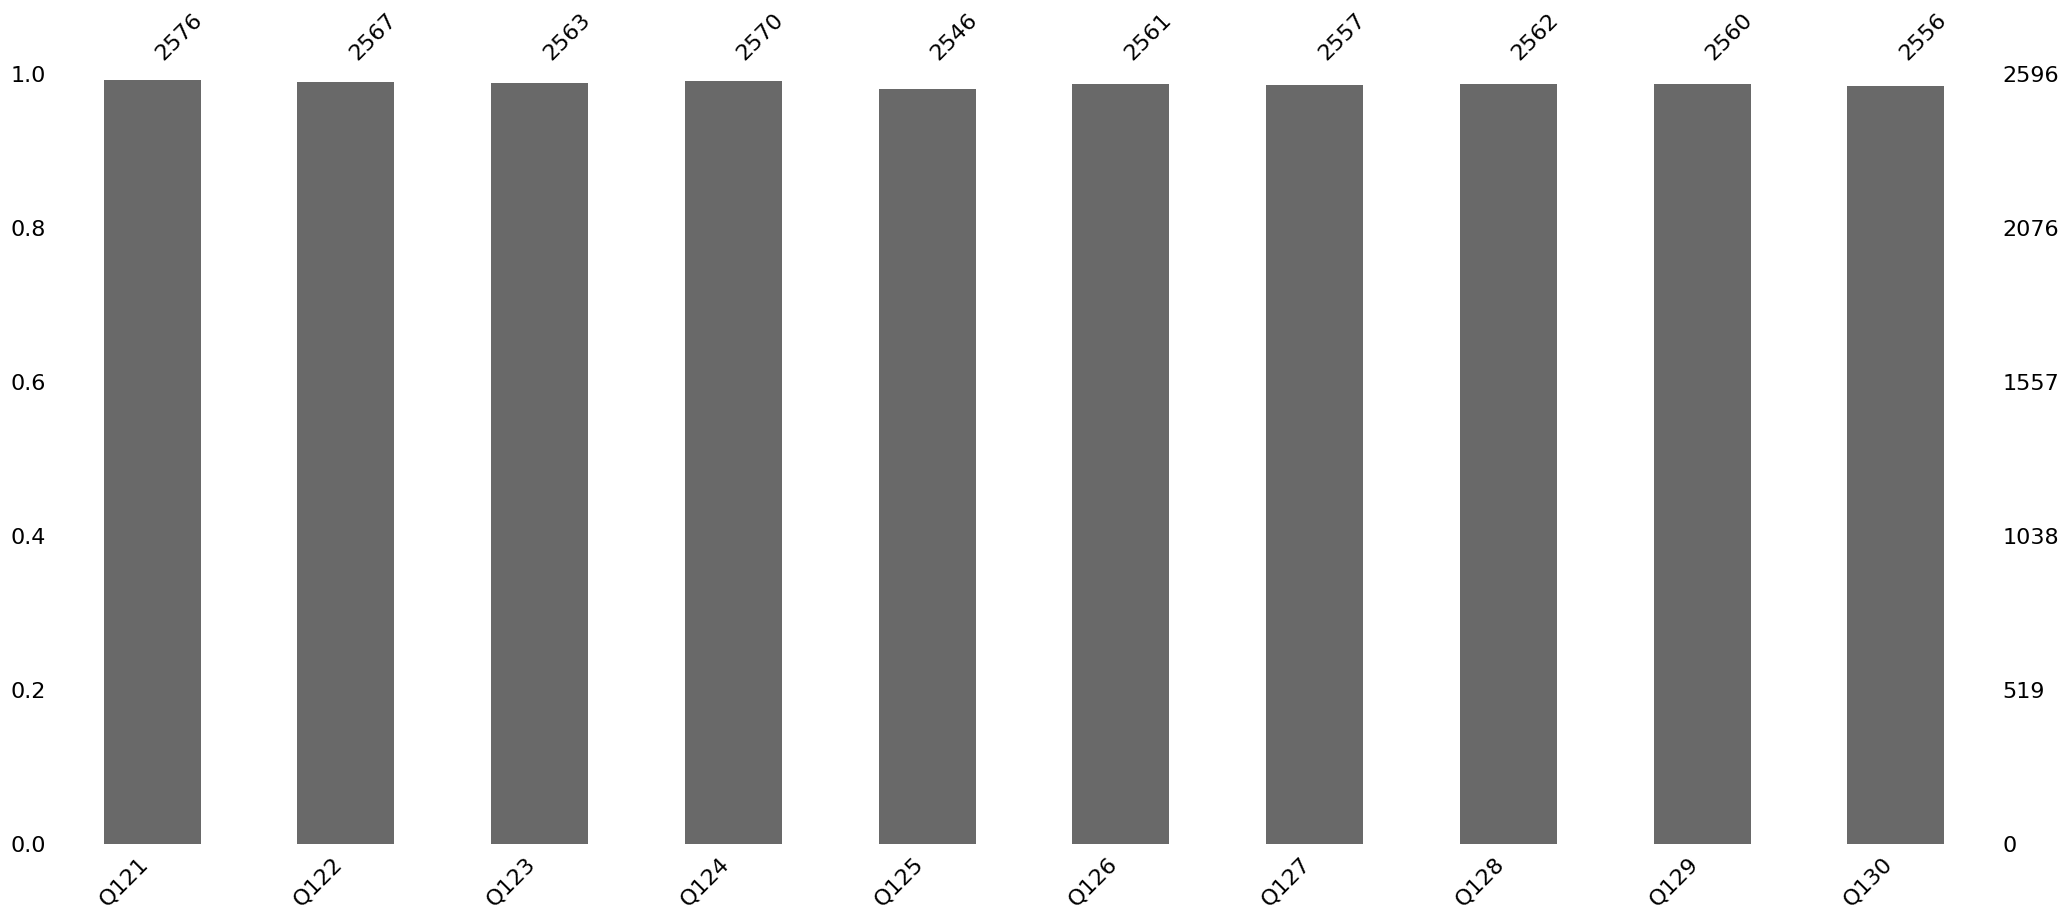

In [4]:
# Preapare dataframe for target questions
df_cn_target = df_cn.loc[:,['Q121','Q122','Q123', 'Q124', 'Q125', 'Q126', 'Q127', 'Q128', 'Q129', 'Q130']]
# Visualize the missing values in each column
msno.bar(df_cn_target)

In [5]:
#Calculate how many missing values in each column
df_cn_target.isnull().sum()

Q121    20
Q122    29
Q123    33
Q124    26
Q125    50
Q126    35
Q127    39
Q128    34
Q129    36
Q130    40
dtype: int64

In [6]:
# Check sub dataset
df_cn_target.describe()

,Q121,Q122,Q123,Q124,Q125,Q126,Q127,Q128,Q129,Q130
count,2576.000000,2567.000000,2563.000000,2570.000000,2546.000000,2561.000000,2557.000000,2562.000000,2560.000000,2556.000000
mean,3.374224,1.528243,1.537651,1.114008,1.309898,1.186646,1.414157,1.101093,1.303906,2.343897
std,0.972485,0.634087,0.665040,0.689575,0.640632,0.756943,0.672628,0.728410,0.673730,0.776543
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
50%,3.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000
75%,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
max,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000


In [7]:
# We divided questions with different emotions, 4 can be positive ones, 5 can be negative ones
Posfeatures = ['Q122', 'Q123','Q125','Q127']
Negfeatures = ['Q124', 'Q126','Q128', 'Q129']
# Set the condition, if people have more positive attitudes towards immigration, then the 
# attitude is positive as 1, else neagative as 0
for i, row in df_cn_target.iterrows():    
    sum_Posfeatures = row[Posfeatures].sum()
    sum_Negfeatures = row[Negfeatures].sum()
    df_cn_target.loc[i, "Attitude"] = 1 if sum_Posfeatures > sum_Negfeatures else 0


In [8]:
# Drop redundant columns and rename another tagert column 
df_cn_target = df_cn_target.drop(['Q122', 'Q123', 'Q127','Q124','Q125', 'Q126','Q128', 'Q129'],axis=1)
df_cn_target = df_cn_target.rename(columns={'Q121': 'Impact_level'})
df_cn_target = df_cn_target.rename(columns={'Q130': 'Willing_level'})
# Show the targets 
df_cn_target


,Impact_level,Willing_level,Attitude
13951,1.0,3.0,0.0
13952,3.0,3.0,0.0
13953,3.0,3.0,0.0
13954,3.0,NaN,0.0
13955,3.0,NaN,0.0
...,...,...,...
87095,3.0,3.0,0.0
87096,4.0,2.0,1.0
87097,3.0,1.0,1.0
87098,5.0,2.0,1.0


In [9]:
df_cn_target.describe()

,Impact_level,Willing_level,Attitude
count,2576.000000,2556.000000,2596.000000
mean,3.374224,2.343897,0.528120
std,0.972485,0.776543,0.499305
min,1.000000,1.000000,0.000000
25%,3.000000,2.000000,0.000000
50%,3.000000,2.000000,1.000000
75%,4.000000,3.000000,1.000000
max,5.000000,4.000000,1.000000


In [10]:
df_cn_target['Attitude'].value_counts()

1.0    1371
0.0    1225
Name: Attitude, dtype: int64

In [11]:
1228/1808

0.6792035398230089

In [ ]:
# Here we can see the data for classification is a little bit Imbalanced but not too much

<AxesSubplot: >

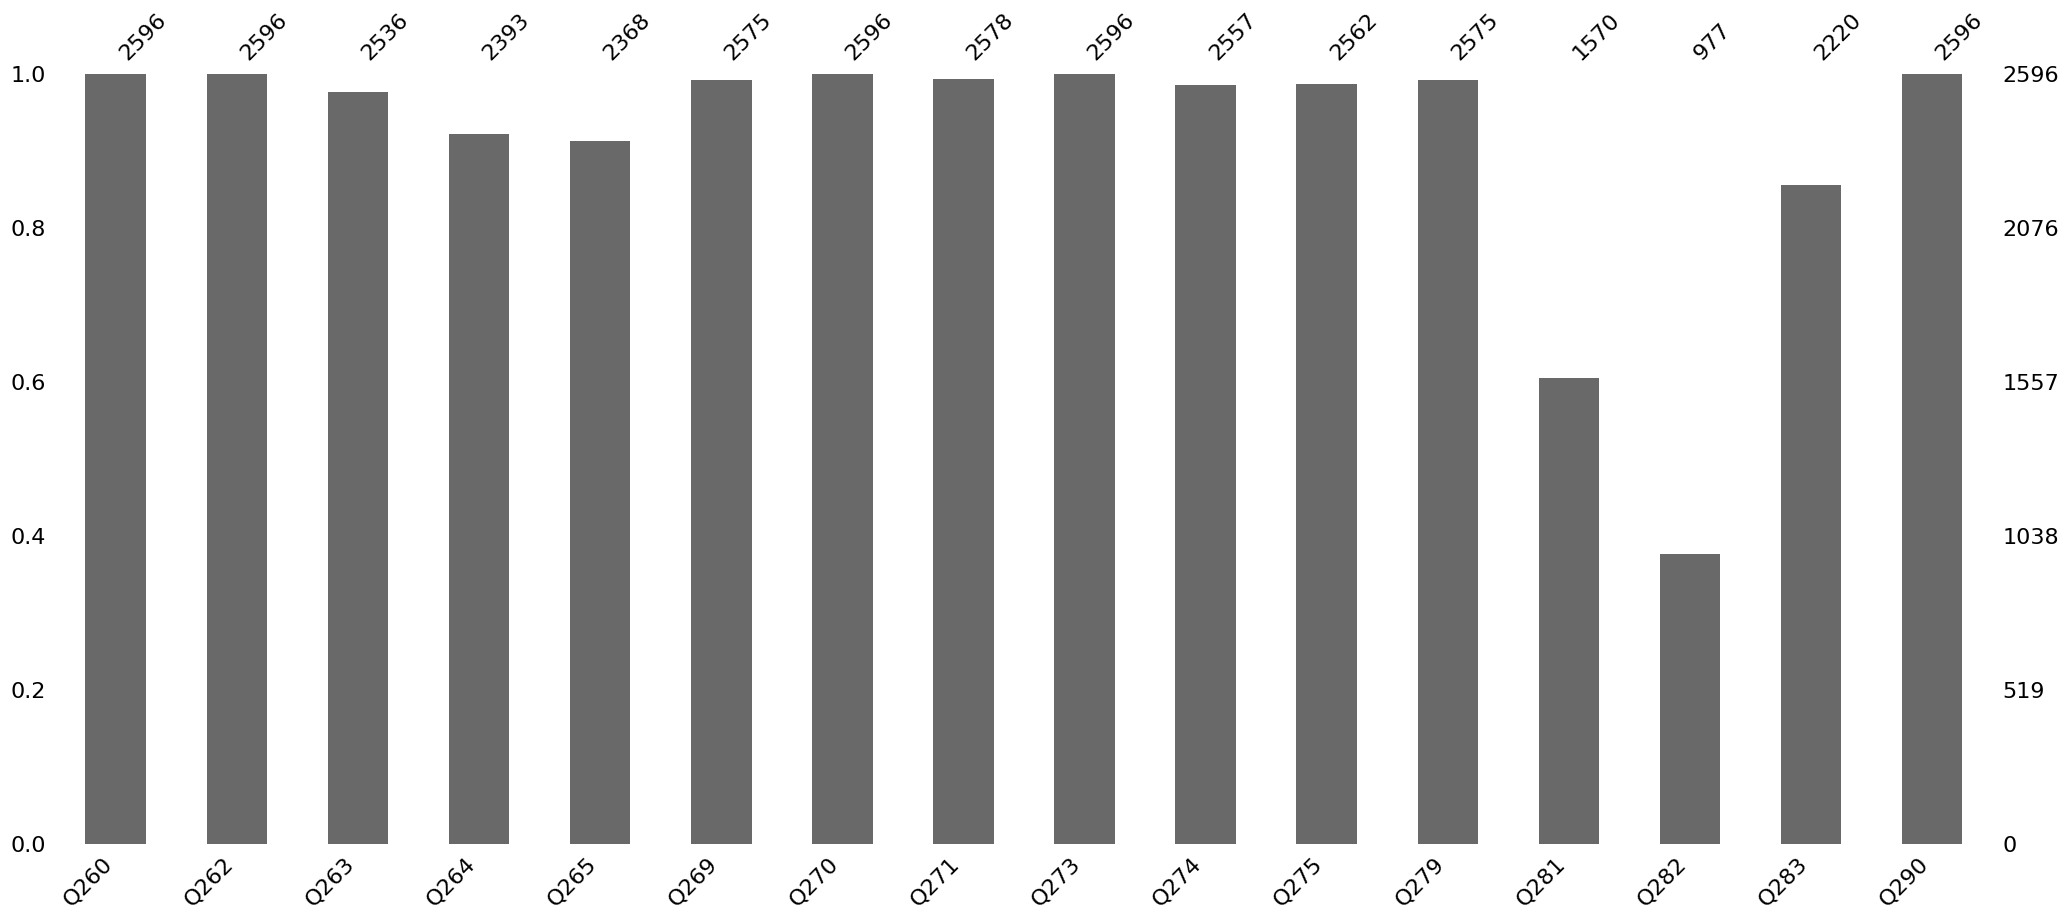

In [18]:
# Preapare dataframe for personal statistics
df_cn_personal = df_cn.loc[:,['Q260', 'Q262', 'Q263','Q264', 'Q265', 'Q269', 'Q270', 
                              'Q271', 'Q273', 'Q274', 'Q275','Q279', 'Q281','Q282','Q283',
                              'Q290']]
# Visualize the missing values in each column
msno.bar(df_cn_personal)

In [19]:
#Calculate how many missing values in each column
df_cn_personal.isnull().sum()

Q260       0
Q262       0
Q263      60
Q264     203
Q265     228
Q269      21
Q270       0
Q271      18
Q273       0
Q274      39
Q275      34
Q279      21
Q281    1026
Q282    1619
Q283     376
Q290       0
dtype: int64

In [21]:
df_cn_personal.describe()

,Q260,Q262,Q263,Q264,Q265,Q269,Q270,Q271,Q273,Q274,Q275,Q279,Q281,Q282,Q283,Q290
count,2596.000000,2596.000000,2536.000000,2393.000000,2368.000000,2575.000000,2596.000000,2578.000000,2596.000000,2557.000000,2562.000000,2575.000000,1570.000000,977.000000,2220.000000,2596.000000
mean,1.464561,43.422188,1.105678,1.153364,1.144426,1.033786,2.785439,1.113654,2.787750,1.520532,4.882123,2.631068,3.556051,3.264074,4.704955,840001.830123
std,0.498839,16.307159,0.307486,0.360413,0.351595,0.180714,1.419855,0.358769,2.129891,1.589797,1.581620,2.120452,2.705607,2.301966,2.591607,1.294733
min,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,840001.000000
25%,1.000000,30.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,4.000000,1.000000,1.000000,1.000000,2.000000,840001.000000
50%,1.000000,41.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,5.000000,1.000000,3.000000,3.000000,6.000000,840001.000000
75%,2.000000,56.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,6.000000,2.000000,6.000000,4.000000,5.000000,5.000000,6.000000,840003.000000
max,2.000000,90.000000,2.000000,2.000000,2.000000,2.000000,6.000000,4.000000,6.000000,15.000000,8.000000,8.000000,11.000000,10.000000,10.000000,840005.000000


In [22]:
df_cn_personal = df_cn_personal.drop(['Q281', 'Q282', 'Q283'],axis=1)

In [24]:
# Rename the sub dataset 
df_cn_personal = df_cn_personal.rename(columns={'Q260': 'Sex','Q262':'Age','Q263':'BornLocal',
                                                'Q264':'MotherLocal','Q265':'FatherLocal',
                                                'Q269':'Citizen','Q270':'FamilySize',
                                                'Q271':'WithParents','Q273':'MaritalSta',
                                                'Q274':'HaveChild','Q275':'Education',
                                                'Q279':'Working','Q290':'Ethic'})


In [25]:
# We assign new values to Working, since we only need to 1 to 0 to reprent if he is working
df_cn_personal['Working'] = df_cn_personal['Working'].apply(lambda x: 1 if x in [1, 2, 3] else 0)



In [202]:
df_cn_personal['Ethic'].value_counts() 

1    1725
4     453
2     210
3     123
5      85
Name: Ethic, dtype: int64

In [201]:
mapping = {840001.0:1,840002.0:2,840003.0:3,840004.0:4,840005.0:5}
df_cn_personal['Ethic'] = df_cn_personal['Ethic'].map(mapping)

In [203]:
df_cn_personal

,Sex,Age,BornLocal,MotherLocal,FatherLocal,Citizen,FamilySize,WithParents,MaritalSta,HaveChild,Education,Working,Ethic
13951,2.0,66.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0,3.0,1,1
13952,2.0,47.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,2.0,4.0,1,1
13953,2.0,54.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0,3.0,1,1
13954,2.0,56.0,1.0,1.0,1.0,1.0,3.0,2.0,3.0,1.0,4.0,1,1
13955,2.0,20.0,1.0,1.0,1.0,1.0,1.0,NaN,6.0,0.0,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87095,2.0,27.0,1.0,2.0,2.0,1.0,5.0,1.0,1.0,3.0,4.0,1,4
87096,2.0,43.0,1.0,1.0,1.0,1.0,3.0,1.0,3.0,1.0,3.0,1,4
87097,2.0,25.0,1.0,2.0,2.0,1.0,3.0,1.0,6.0,1.0,5.0,0,4
87098,1.0,59.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,2.0,6.0,1,4


<AxesSubplot: >

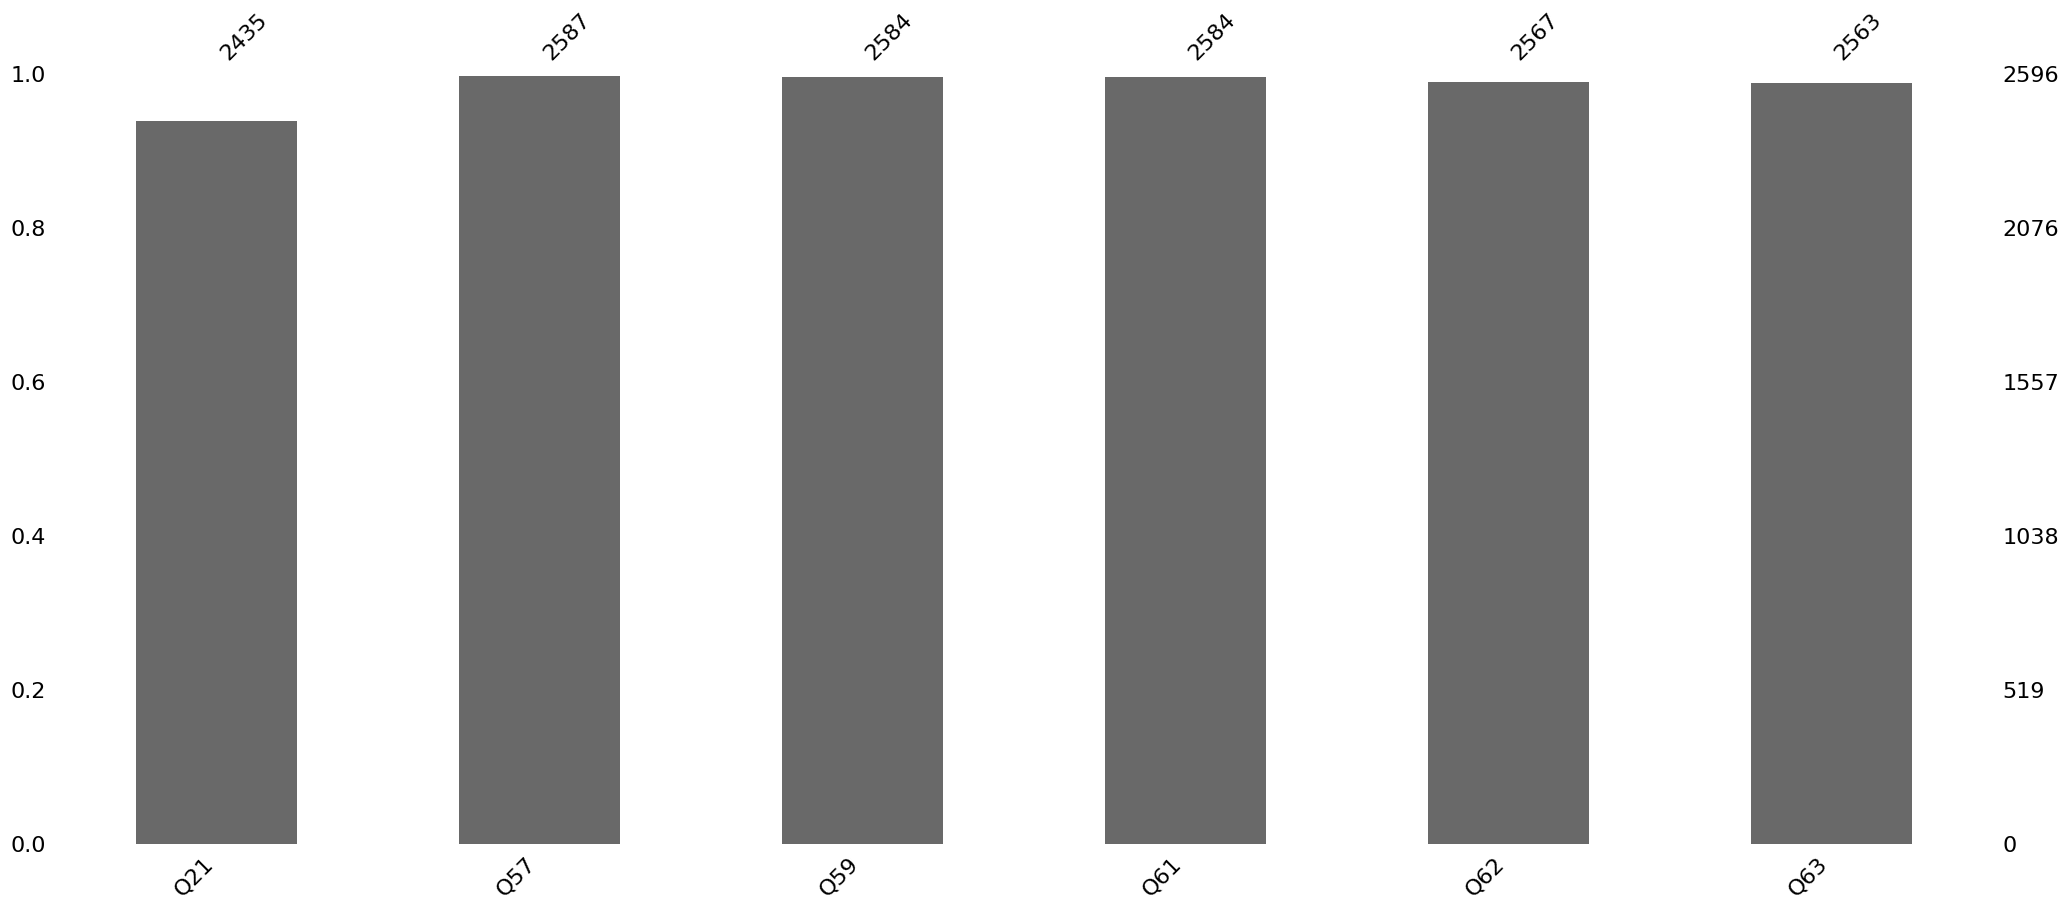

In [27]:
# Preapare dataframe for trust
df_cn_trust = df_cn.loc[:,['Q21','Q57','Q59', 'Q61', 'Q62', 'Q63']]
# Visualize the missing values in each column
msno.bar(df_cn_trust)

In [28]:
#Calculate how many missing values in each column
df_cn_trust.isnull().sum()

Q21    161
Q57      9
Q59     12
Q61     12
Q62     29
Q63     33
dtype: int64

In [29]:
df_cn_trust = df_cn_trust.rename(columns={'Q21': 'NeighborImmi','Q57':'TrustMost','Q59':'TrustNeighbor','Q61':'TrustNewPeo',
                                               'Q62':'TrustNewPeoReli','Q63':'TrustNewPeoNat'})

In [30]:
df_cn_trust.describe()

,NeighborImmi,TrustMost,TrustNeighbor,TrustNewPeo,TrustNewPeoReli,TrustNewPeoNat
count,2435.000000,2587.000000,2584.000000,2584.000000,2567.000000,2563.000000
mean,1.912115,1.602629,2.238003,2.770124,2.225555,2.216543
std,0.283186,0.489449,0.703024,0.738692,0.646474,0.642260
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000
50%,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000
75%,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000
max,2.000000,2.000000,4.000000,4.000000,4.000000,4.000000


In [31]:
# Calculate the avg sum of the columns
df_cn_trust['TrustAvg'] = (df_cn_trust['TrustNeighbor'] + df_cn_trust['TrustNewPeo'] 
                        + df_cn_trust['TrustNewPeoReli'] + df_cn_trust['TrustNewPeoNat'])/4


In [32]:
df_cn_trust['TrustAvg'].describe()

count    2547.000000
mean        2.360718
std         0.535935
min         1.000000
25%         2.000000
50%         2.250000
75%         2.750000
max         4.000000
Name: TrustAvg, dtype: float64

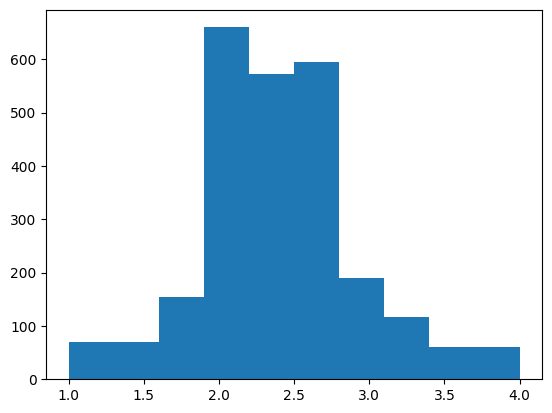

In [33]:
# Extract the values from the "TrustAvg" column
values = df_cn_trust['TrustAvg'].values

# Create a histogram of the values
plt.hist(values)

# Show the plot
plt.show()

In [213]:
df_cn_trust['TrustAvg'].value_counts()

2.00    660
2.25    572
2.50    321
2.75    274
3.00    189
1.75    154
3.25    116
1.50     70
3.50     61
1.25     59
4.00     32
3.75     28
1.00     11
Name: TrustAvg, dtype: int64

In [214]:
# Create the mapping dictionary
mapping = {1.00: 1, 1.25: 2, 1.50: 3, 1.75: 4, 2.00: 5, 2.25: 6, 2.50: 7, 2.75: 8,
           3.00: 9, 3.25: 10, 3.50:11, 3.75:12, 4.00:13}

# Use the map function to apply the mapping to the 'FinanceSta' column
df_cn_trust['TrustAvg'] = df_cn_trust['TrustAvg'].map(mapping)

In [34]:
df_cn_trust = df_cn_trust.drop(['TrustNeighbor','TrustNewPeo','TrustNewPeoReli',
                                 'TrustNewPeoNat'],axis=1)

In [215]:
df_cn_trust

,NeighborImmi,TrustMost,TrustAvg
13951,2.0,1.0,3.0
13952,2.0,1.0,8.0
13953,NaN,1.0,5.0
13954,2.0,2.0,5.0
13955,2.0,2.0,6.0
...,...,...,...
87095,2.0,2.0,10.0
87096,2.0,2.0,5.0
87097,2.0,2.0,5.0
87098,2.0,2.0,5.0


<AxesSubplot: >

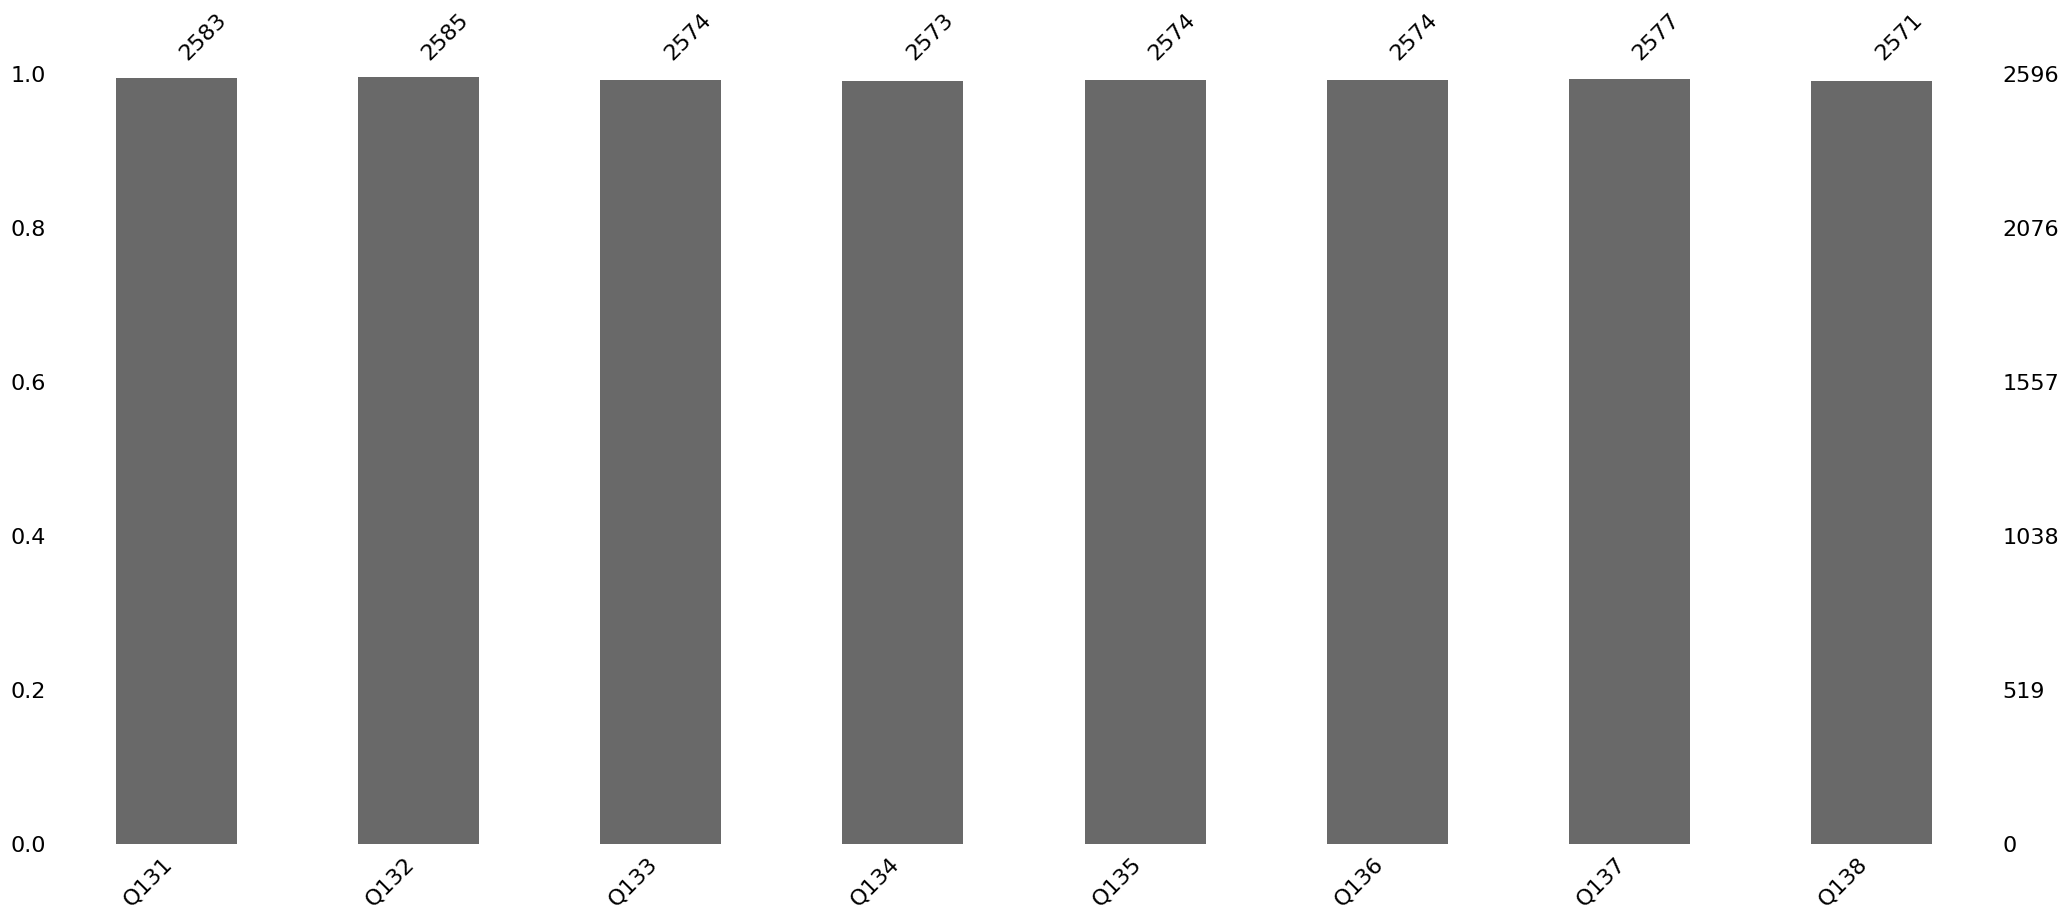

In [45]:
# Preapare dataframe for secure
df_cn_secure = df_cn.loc[:,['Q131','Q132','Q133','Q134','Q135','Q136','Q137','Q138']]
# Visualize the missing values in each column
msno.bar(df_cn_secure)


In [46]:
#Calculate how many missing values in each column
df_cn_secure.isnull().sum()

Q131    13
Q132    11
Q133    22
Q134    23
Q135    22
Q136    22
Q137    19
Q138    25
dtype: int64

In [47]:
df_cn_secure.describe()

,Q131,Q132,Q133,Q134,Q135,Q136,Q137,Q138
count,2583.000000,2585.000000,2574.000000,2573.000000,2574.000000,2574.000000,2577.000000,2571.000000
mean,2.260550,3.040619,3.024087,3.352507,3.024087,3.055167,3.276678,3.246208
std,0.710563,0.806498,0.922683,0.764003,0.872009,0.972647,0.850586,0.804934
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000
50%,2.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [48]:
# Calculate the avg sum of the columns
df_cn_secure['SecureSta'] = (df_cn_secure['Q132']+df_cn_secure['Q133']+df_cn_secure['Q134']+df_cn_secure['Q135']
                            +df_cn_secure['Q136']+df_cn_secure['Q137']+df_cn_secure['Q138'])/7


In [49]:
df_cn_secure['SecureSta'].describe()

count    2531.000000
mean        3.147542
std         0.692114
min         1.000000
25%         2.714286
50%         3.142857
75%         3.714286
max         4.000000
Name: SecureSta, dtype: float64

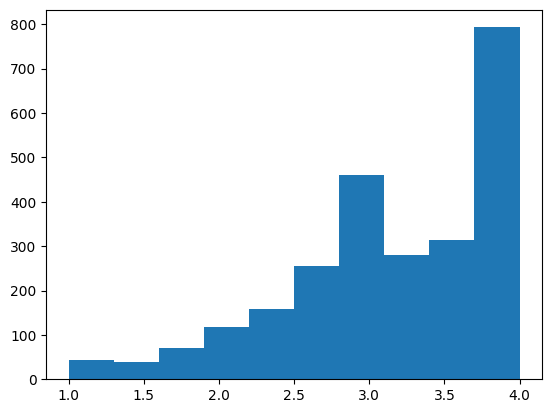

In [50]:
# Extract the values from the "TrustAvg" column
values = df_cn_secure['SecureSta'].values

# Create a histogram of the values
plt.hist(values)

# Show the plot
plt.show()

In [207]:
df_cn_secure['SecureSta'] = pd.cut(df_cn_secure['SecureSta'],8)

In [210]:
df_cn_secure['SecureSta'].value_counts()

8    793
6    460
7    437
5    413
4    223
3     89
2     73
1     43
Name: SecureSta, dtype: int64

In [209]:
def assign_value(x):
    if x.right <= 1.375:
        return 1
    elif x.right <= 1.75:
        return 2
    elif x.right <= 2.125:
        return 3
    elif x.right <= 2.5:
        return 4
    elif x.right <= 2.875:
        return 5
    elif x.right <= 3.25:
        return 6
    elif x.right <= 3.625:
        return 7
    else:
        return 8

df_cn_secure['SecureSta'] = df_cn_secure['SecureSta'].apply(assign_value)

In [51]:
df_cn_secure = df_cn_secure.rename(columns={'Q131':'SecureLevel'})

In [52]:
df_cn_secure = df_cn_secure.drop(['Q132','Q133','Q134','Q135','Q136','Q137','Q138'],axis = 1) 

In [211]:
df_cn_secure 

,SecureLevel,SecureSta
13951,2.0,8
13952,3.0,1
13953,2.0,5
13954,3.0,6
13955,NaN,NaN
...,...,...
87095,2.0,7
87096,3.0,4
87097,2.0,7
87098,2.0,7


<AxesSubplot: >

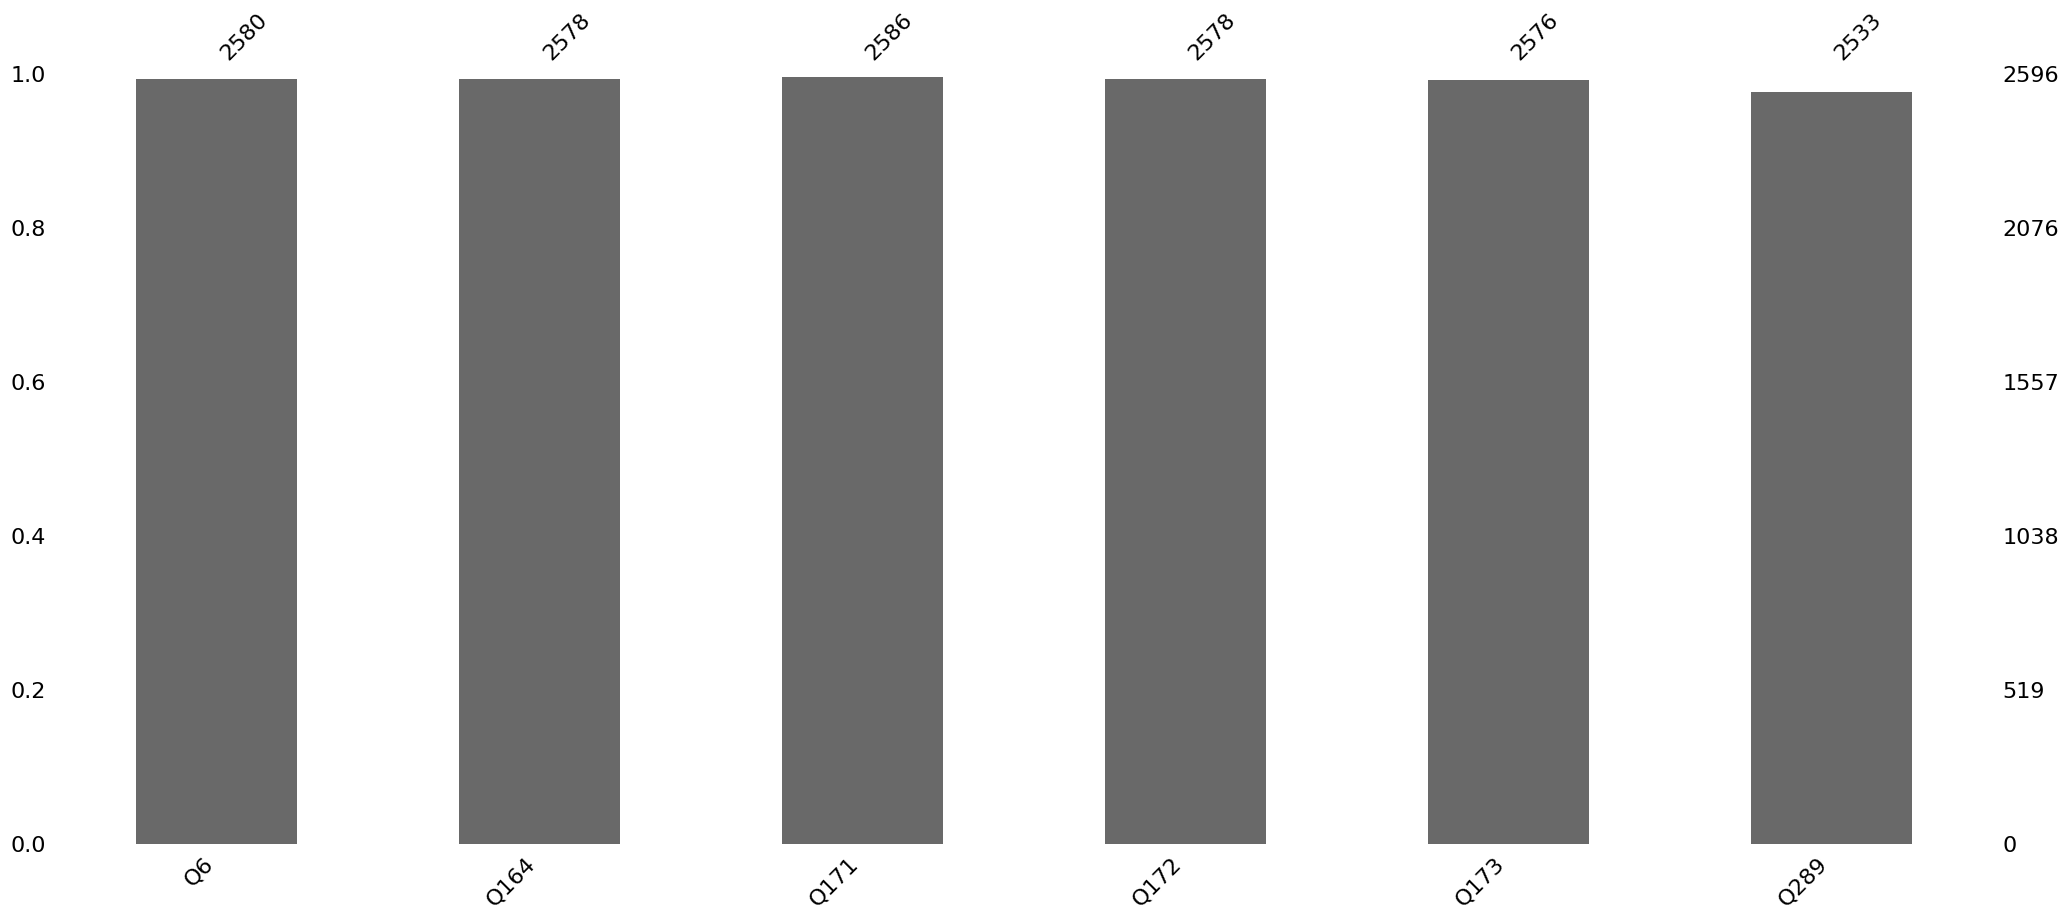

In [54]:
# Preapare dataframe for religion
df_cn_religion = df_cn.loc[:,['Q6','Q164','Q171','Q172','Q173','Q289']]
# Visualize the missing values in each column
msno.bar(df_cn_religion)


In [55]:
#Calculate how many missing values in each column
df_cn_religion.isnull().sum()

Q6      16
Q164    18
Q171    10
Q172    18
Q173    20
Q289    63
dtype: int64

In [56]:
df_cn_religion = df_cn_religion.rename(columns={'Q6':'ReligionImp','Q164':'GodImp',
                                                'Q171':'ReligionSer','Q172':'Pray',
                                                'Q173':'ReligousSelf','Q289':'ReligiousBelong' })

In [57]:
df_cn_religion

,ReligionImp,GodImp,ReligionSer,Pray,ReligousSelf,ReligiousBelong
13951,2.0,10.0,6.0,2.0,2.0,2.0
13952,3.0,8.0,7.0,2.0,2.0,0.0
13953,1.0,10.0,6.0,1.0,1.0,8.0
13954,1.0,8.0,2.0,3.0,2.0,1.0
13955,3.0,5.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
87095,2.0,10.0,7.0,7.0,2.0,0.0
87096,4.0,1.0,7.0,8.0,3.0,0.0
87097,4.0,1.0,7.0,8.0,2.0,0.0
87098,3.0,2.0,6.0,8.0,1.0,0.0


In [58]:
# Calculate the avg sum of the columns
df_cn_religion['ReligionAct'] = (df_cn_religion['ReligionSer']+df_cn_religion['Pray'])/2


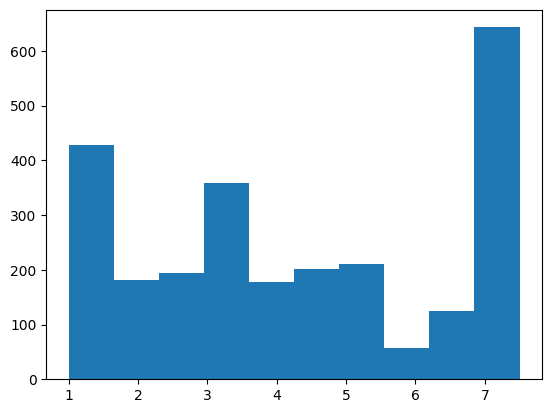

In [59]:
# Extract the values from the "TrustAvg" column
values = df_cn_religion['ReligionAct'].values

# Create a histogram of the values
plt.hist(values)

# Show the plot
plt.show()

In [60]:
df_cn_religion['ReligionAct'].value_counts()

7.5    478
1.5    268
4.5    202
3.5    194
2.5    194
2.0    181
4.0    178
7.0    165
3.0    164
1.0    160
5.0    149
6.5    125
5.5     61
6.0     57
Name: ReligionAct, dtype: int64

In [61]:
df_cn_religion = df_cn_religion.drop(['Pray', 'ReligionSer'],axis=1)

In [62]:
df_cn_religion.loc[df_cn_religion['ReligiousBelong'] != 0, 'ReligiousBelong'] = 1

In [63]:
df_cn_religion.loc[df_cn_religion['ReligousSelf'] != 1, 'ReligousSelf'] = 2

In [64]:
df_cn_religion.describe()

,ReligionImp,GodImp,ReligousSelf,ReligiousBelong,ReligionAct
count,2580.000000,2578.000000,2596.000000,2596.000000,2576.000000
mean,2.295349,6.717611,1.451079,0.541217,4.338509
std,1.128939,3.452006,0.497697,0.498394,2.236443
min,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.000000,4.000000,1.000000,0.000000,2.500000
50%,2.000000,8.000000,1.000000,1.000000,4.000000
75%,3.000000,10.000000,2.000000,1.000000,6.500000
max,4.000000,10.000000,2.000000,1.000000,7.500000


In [65]:
df_cn_religion

,ReligionImp,GodImp,ReligousSelf,ReligiousBelong,ReligionAct
13951,2.0,10.0,2.0,1.0,4.0
13952,3.0,8.0,2.0,0.0,4.5
13953,1.0,10.0,1.0,1.0,3.5
13954,1.0,8.0,2.0,1.0,2.5
13955,3.0,5.0,2.0,1.0,NaN
...,...,...,...,...,...
87095,2.0,10.0,2.0,0.0,7.0
87096,4.0,1.0,2.0,0.0,7.5
87097,4.0,1.0,2.0,0.0,7.5
87098,3.0,2.0,1.0,0.0,7.0


<AxesSubplot: >

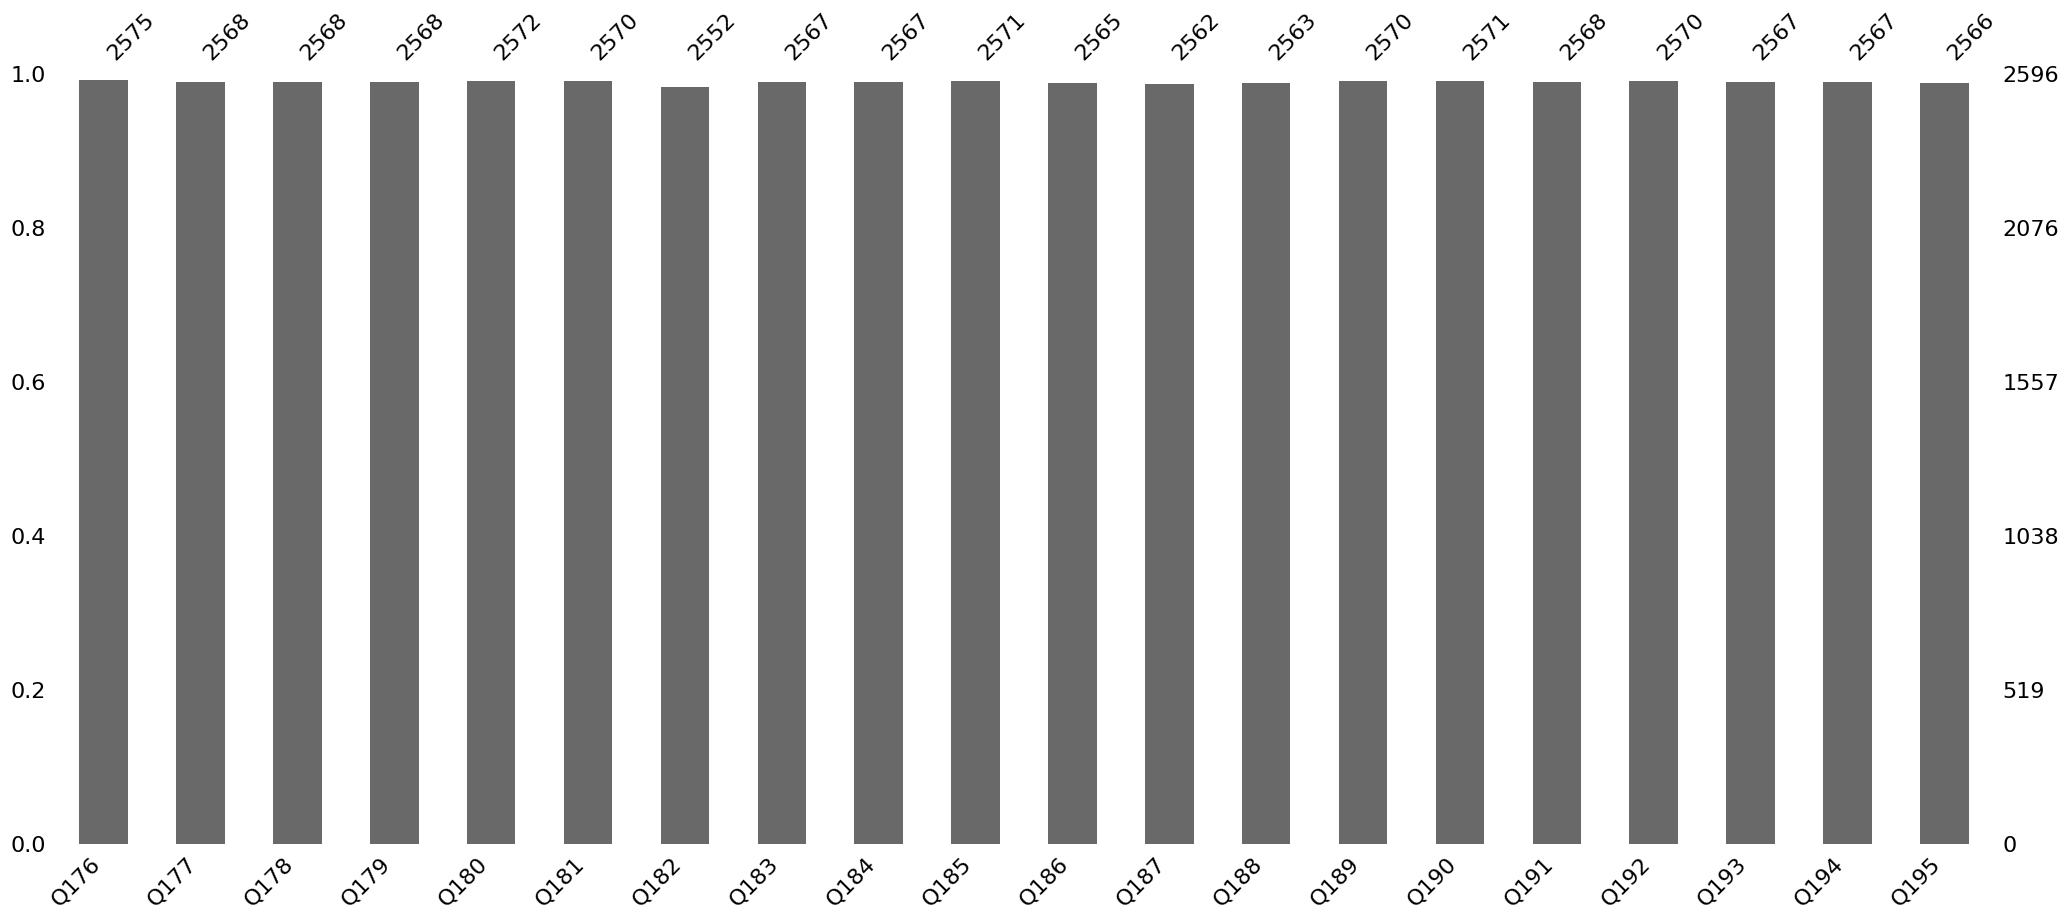

In [66]:
# Preapare dataframe for morality
df_cn_morality = df_cn.loc[:,['Q176', 'Q177','Q178', 'Q179', 'Q180', 'Q181', 'Q182', 'Q183', 'Q184',
'Q185', 'Q186','Q187', 'Q188', 'Q189', 'Q190', 'Q191', 'Q192', 'Q193', 
'Q194', 'Q195']]
# Visualize the missing values in each column
msno.bar(df_cn_morality)

In [67]:
#Calculate how many missing values in each column
df_cn_morality.isnull().sum()

Q176    21
Q177    28
Q178    28
Q179    28
Q180    24
Q181    26
Q182    44
Q183    29
Q184    29
Q185    25
Q186    31
Q187    34
Q188    33
Q189    26
Q190    25
Q191    28
Q192    26
Q193    29
Q194    29
Q195    30
dtype: int64

In [68]:
# Create an empty list to store the column names
column_names = []

# Use a for loop to generate the column names
for i in range(177, 196):
    column_name = 'Q' + str(i)
    column_names.append(column_name)

# Calculate the sum of the columns
df_cn_morality['MoralityLevel'] = df_cn_morality[column_names].mean(axis=1)

In [69]:
df_cn_morality['MoralityLevel'].value_counts()

3.684211    51
3.789474    50
5.000000    49
4.368421    49
4.157895    47
            ..
3.181818     1
2.555556     1
3.687500     1
3.166667     1
8.105263     1
Name: MoralityLevel, Length: 210, dtype: int64

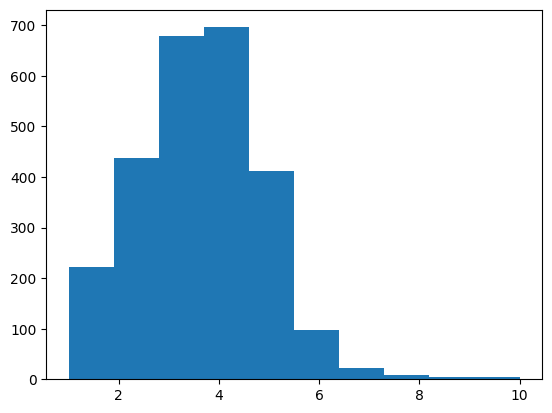

In [70]:
# Extract the values from the "TrustAvg" column
values = df_cn_morality['MoralityLevel'].values

# Create a histogram of the values
plt.hist(values)

# Show the plot
plt.show()

In [71]:
df_cn_morality['MoralityLevel'] = pd.cut(df_cn_morality['MoralityLevel'], 10)


In [72]:
df_cn_morality['MoralityLevel'].value_counts()

(3.7, 4.6]      696
(2.8, 3.7]      679
(1.9, 2.8]      437
(4.6, 5.5]      411
(0.991, 1.9]    222
(5.5, 6.4]       98
(6.4, 7.3]       23
(7.3, 8.2]        9
(9.1, 10.0]       5
(8.2, 9.1]        4
Name: MoralityLevel, dtype: int64

In [73]:
def assign_value(x):
    if x.right <= 1.9:
        return 1
    elif x.right <= 2.8:
        return 2
    elif x.right <= 3.7:
        return 3
    elif x.right <= 4.6:
        return 4
    elif x.right <= 5.5:
        return 5
    elif x.right <= 6.4:
        return 6
    elif x.right <= 7.3:
        return 7
    elif x.right <= 8.2:
        return 8
    elif x.right <= 9.1:
        return 9
    else:
        return 10

df_cn_morality['MoralityLevel'] = df_cn_morality['MoralityLevel'].apply(assign_value)

In [74]:
df_cn_morality = df_cn_morality.drop(columns=column_names)

In [75]:
df_cn_morality = df_cn_morality.rename(columns={'Q176':'MoralSense'})

In [76]:
df_cn_morality

,MoralSense,MoralityLevel
13951,4.0,2
13952,2.0,4
13953,3.0,2
13954,3.0,2
13955,5.0,5
...,...,...
87095,1.0,3
87096,10.0,4
87097,10.0,5
87098,4.0,4


<AxesSubplot: >

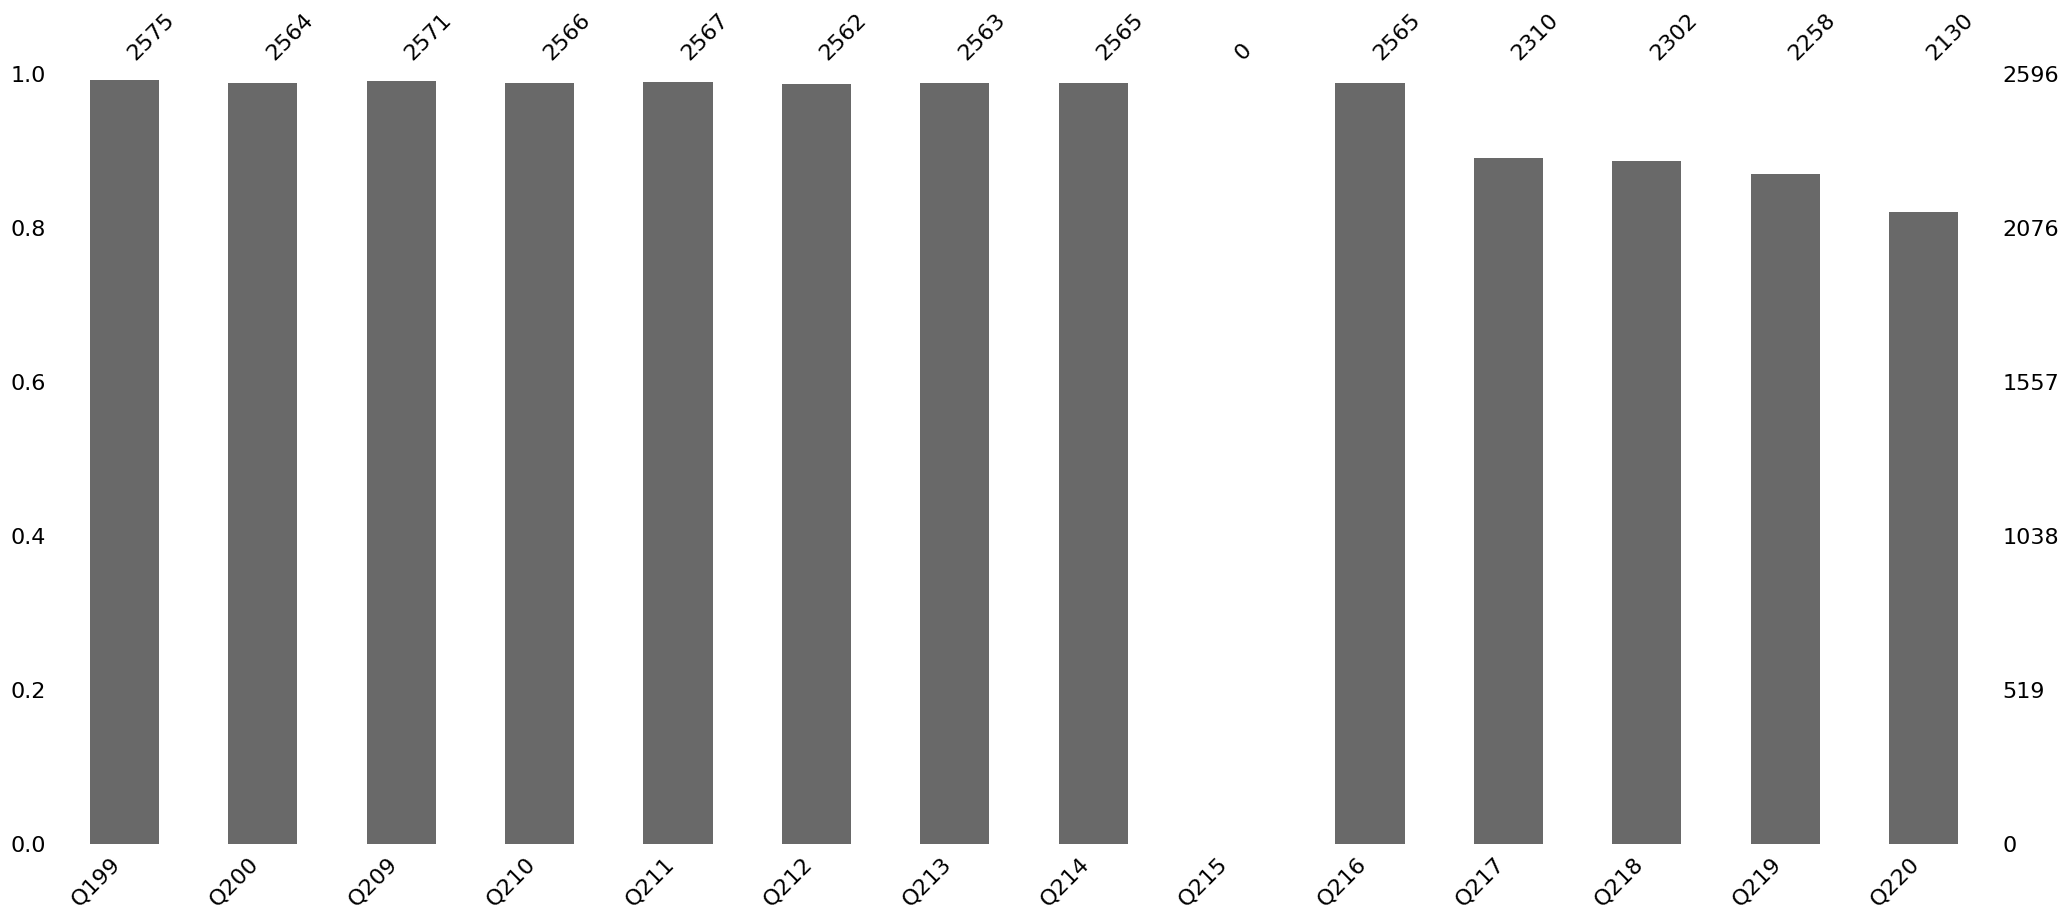

In [132]:
# Preapare dataframe for politics
df_cn_politics = df_cn.loc[:,['Q199', 'Q200', 'Q209', 'Q210', 'Q211', 'Q212', 'Q213', 'Q214', 'Q215',
'Q216', 'Q217', 'Q218', 'Q219', 'Q220']]
# Visualize the missing values in each column
msno.bar(df_cn_politics)

In [133]:
#Calculate how many missing values in each column
df_cn_politics.isnull().sum()

Q199      21
Q200      32
Q209      25
Q210      30
Q211      29
Q212      34
Q213      33
Q214      31
Q215    2596
Q216      31
Q217     286
Q218     294
Q219     338
Q220     466
dtype: int64

In [134]:
df_cn_politics = df_cn_politics.drop(['Q215'],axis =1 )

In [135]:
# Create an empty list to store the column names
column_names = ['Q200']

# Use a for loop to generate the column names
for i in range(209, 215):
    column_name = 'Q' + str(i)
    column_names.append(column_name)

for j in range(216, 221):
    column_name = 'Q' + str(j)
    column_names.append(column_name)
    
# Calculate the sum of the columns
df_cn_politics['PoliticsAct'] = df_cn_politics[column_names].mean(axis=1)

In [136]:
df_cn_politics = df_cn_politics.drop(columns=column_names)

In [137]:
df_cn_politics = df_cn_politics.rename(columns={'Q199':'PoliticsInt'})

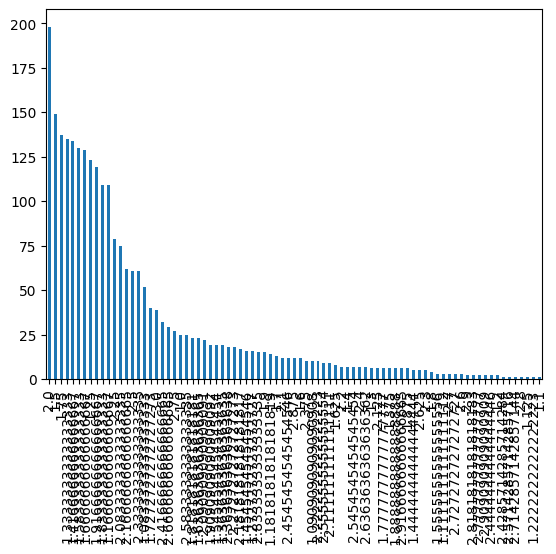

In [138]:
df_cn_politics['PoliticsAct'].value_counts().plot.bar()
plt.show()

In [139]:
df_cn_politics['PoliticsAct']= pd.cut(df_cn_politics['PoliticsAct'], 10)


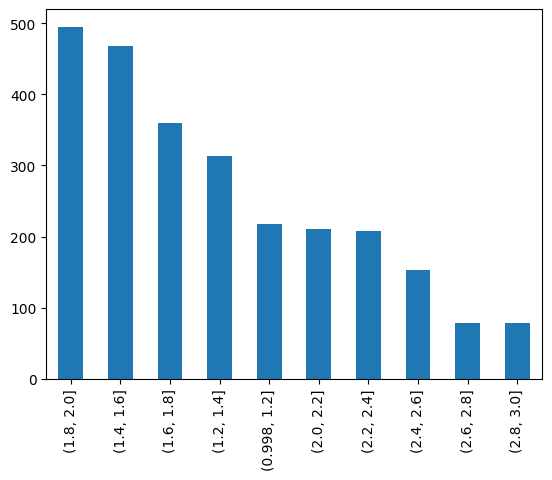

In [140]:
df_cn_politics['PoliticsAct'].value_counts().plot.bar()
plt.show()

In [141]:
df_cn_politics['PoliticsAct'].value_counts()

(1.8, 2.0]      495
(1.4, 1.6]      468
(1.6, 1.8]      360
(1.2, 1.4]      313
(0.998, 1.2]    217
(2.0, 2.2]      210
(2.2, 2.4]      208
(2.4, 2.6]      153
(2.6, 2.8]       78
(2.8, 3.0]       78
Name: PoliticsAct, dtype: int64

In [142]:
def assign_value(x):
    if x.right <= 1.2:
        return 1
    elif x.right <= 1.4:
        return 2
    elif x.right <= 1.6:
        return 3
    elif x.right <= 1.8:
        return 4
    elif x.right <= 2.0:
        return 5
    elif x.right <= 2.2:
        return 6
    elif x.right <= 2.4:
        return 7
    elif x.right <= 2.6:
        return 8
    elif x.right <= 2.8:
        return 9
    else:
        return 10

df_cn_politics['PoliticsAct'] = df_cn_politics['PoliticsAct'].apply(assign_value)


In [143]:
df_cn_politics['PoliticsAct'].dtype

CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ordered=True)

In [144]:
# Get the integer codes for the categories
df_cn_politics['PoliticsAct'] = df_cn_politics['PoliticsAct'].cat.codes
df_cn_politics['PoliticsAct'] = df_cn_politics['PoliticsAct'].apply(lambda x: x + 1)

In [145]:
df_cn_politics.describe()


,PoliticsInt,PoliticsAct
count,2575.000000,2596.00000
mean,2.206602,4.46225
std,0.912677,2.30500
min,1.000000,0.00000
25%,2.000000,3.00000
50%,2.000000,4.00000
75%,3.000000,6.00000
max,4.000000,10.00000


<AxesSubplot: >

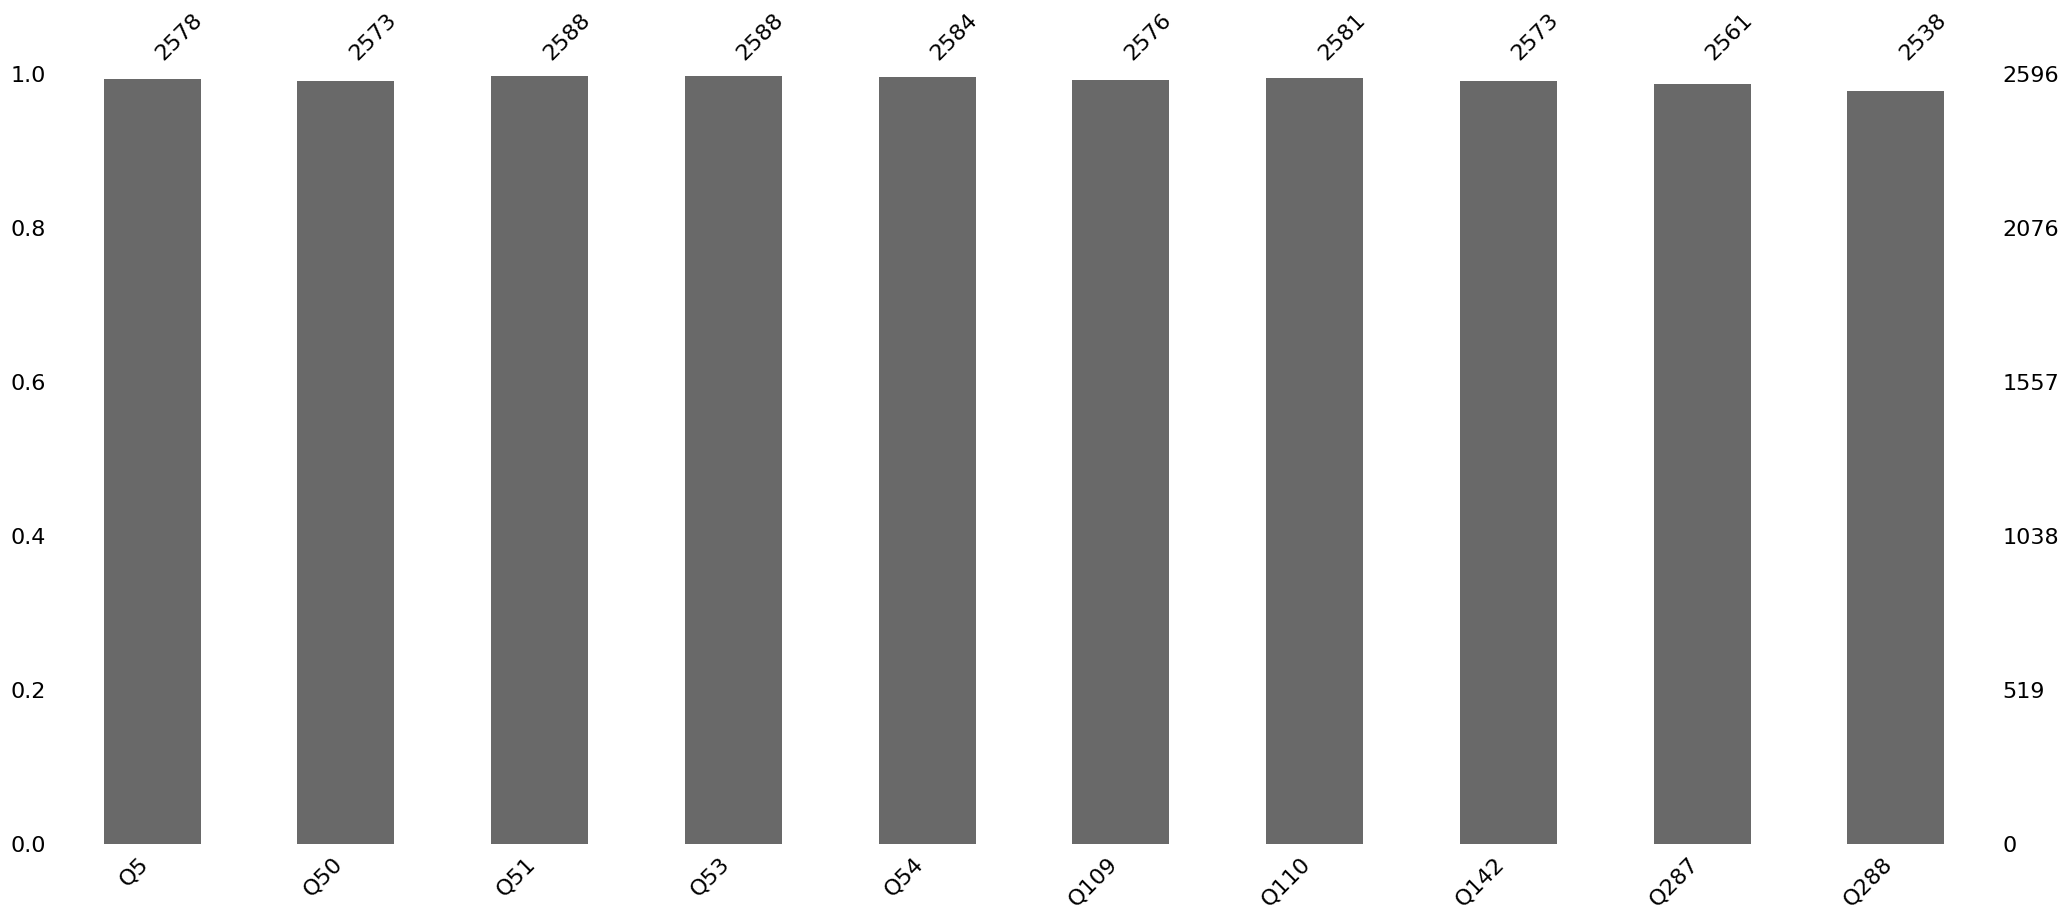

In [166]:
# Preapare dataframe for economics
df_cn_economics = df_cn.loc[:,['Q5','Q50','Q51','Q53','Q54','Q109','Q110','Q142','Q287','Q288']]
# Visualize the missing values in each column
msno.bar(df_cn_economics)

In [167]:
#Calculate how many missing values in each column
df_cn_economics.isnull().sum()

Q5      18
Q50     23
Q51      8
Q53      8
Q54     12
Q109    20
Q110    15
Q142    23
Q287    35
Q288    58
dtype: int64

In [168]:
df_cn_economics = df_cn_economics.rename(columns = {'Q5':'WorkImp','Q50':'FinanceSat',
                                                    'Q51':'EnoughFood','Q53':'EnoughMed',
                                                    'Q54':'EnoughCash',
                                                   'Q109':'CompetitionAtt','Q110':'HardWork',
                                                   'Q142':'WorryJob','Q287':'ClassSelf',
                                                   'Q288':'ClassHouse'})

In [169]:
df_cn_economics

,WorkImp,FinanceSat,EnoughFood,EnoughMed,EnoughCash,CompetitionAtt,HardWork,WorryJob,ClassSelf,ClassHouse
13951,1.0,9.0,4.0,4.0,4.0,4.0,3.0,4.0,2.0,NaN
13952,2.0,5.0,4.0,2.0,1.0,4.0,1.0,4.0,4.0,NaN
13953,1.0,10.0,4.0,4.0,4.0,5.0,3.0,4.0,4.0,6.0
13954,2.0,5.0,4.0,3.0,3.0,4.0,3.0,3.0,4.0,5.0
13955,2.0,5.0,2.0,2.0,4.0,5.0,5.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
87095,1.0,6.0,4.0,4.0,4.0,5.0,1.0,4.0,3.0,5.0
87096,2.0,7.0,4.0,1.0,4.0,5.0,5.0,1.0,4.0,NaN
87097,1.0,1.0,4.0,1.0,1.0,6.0,10.0,NaN,3.0,4.0
87098,2.0,6.0,4.0,4.0,4.0,4.0,1.0,4.0,3.0,4.0


In [190]:
# Calculate the avg sum of the columns
df_cn_economics['FinanceSta'] = round((df_cn_economics['EnoughFood'] +df_cn_economics['EnoughMed'] 
                        + df_cn_economics['EnoughCash'] )/3,2)


In [152]:
df_cn_economics = df_cn_economics.drop(['EnoughFood', 'EnoughMed','EnoughCash'],axis=1)

In [193]:
df_cn_economics['FinanceSta'].value_counts()

10.0    1295
9.0      290
8.0      279
7.0      219
6.0      153
5.0      130
4.0      105
3.0       56
2.0       33
1.0       19
Name: FinanceSta, dtype: int64

In [192]:
# Create the mapping dictionary
mapping = {1.00: 1, 1.33: 2, 1.67: 3, 2.00: 4, 2.33: 5, 2.67: 6, 3.00: 7, 3.33: 8,
           3.67: 9, 4.00: 10}

# Use the map function to apply the mapping to the 'FinanceSta' column
df_cn_economics['FinanceSta'] = df_cn_economics['FinanceSta'].map(mapping)



In [194]:
df_cn_economics.describe()

,WorkImp,FinanceSat,EnoughFood,EnoughMed,EnoughCash,CompetitionAtt,HardWork,WorryJob,ClassSelf,ClassHouse,FinanceSta
count,2578.000000,2573.000000,2588.000000,2588.000000,2584.000000,2576.000000,2581.000000,2573.000000,2561.000000,2538.000000,2579.000000
mean,1.854926,6.094054,3.605100,3.396832,3.359907,3.230978,3.773731,2.835212,3.058961,5.051221,8.362156
std,0.847224,2.397449,0.767632,0.925408,0.969389,2.147165,2.541124,1.011237,0.934599,1.882574,2.187111
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,5.000000,3.000000,3.000000,3.000000,1.000000,1.000000,2.000000,2.000000,4.000000,7.000000
50%,2.000000,6.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,5.000000,10.000000
75%,2.000000,8.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,6.000000,10.000000
max,4.000000,10.000000,4.000000,4.000000,4.000000,10.000000,10.000000,4.000000,5.000000,10.000000,10.000000


<AxesSubplot: >

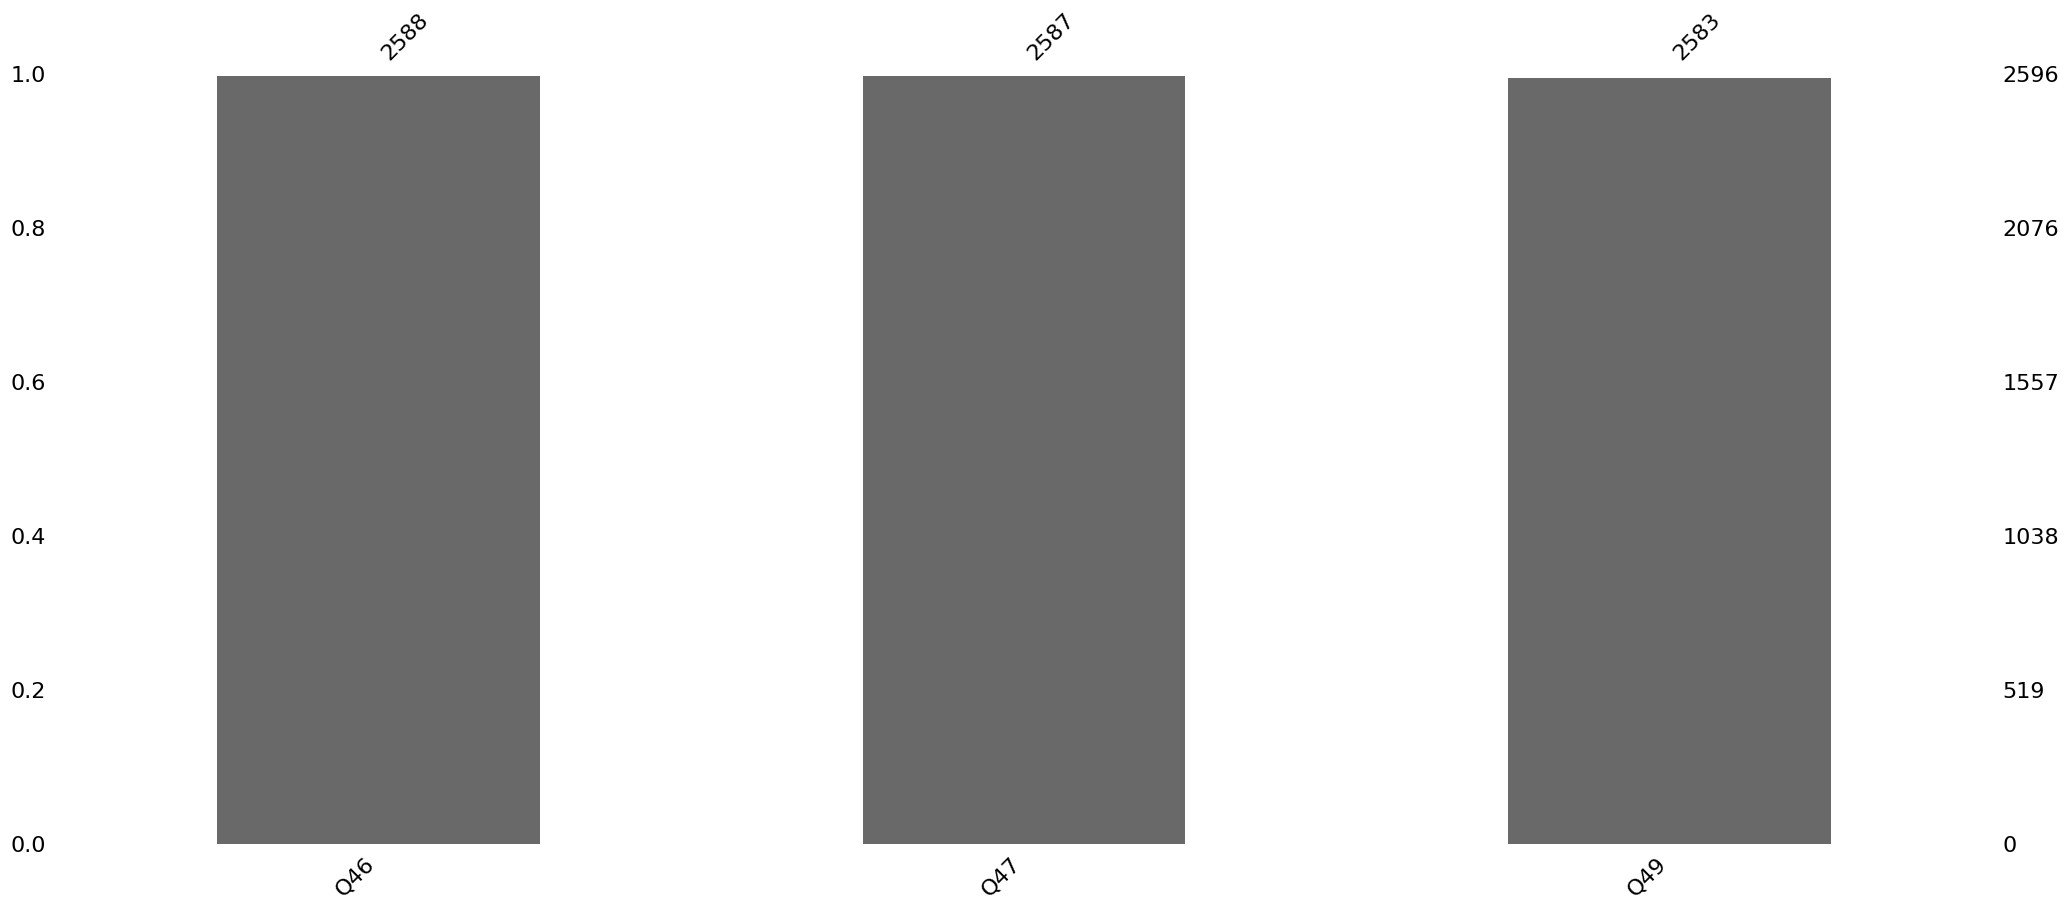

In [195]:
# Preapare dataframe for happiness
df_cn_happy = df_cn.loc[:,['Q46', 'Q47', 'Q49']]
# Visualize the missing values in each column
msno.bar(df_cn_happy)

In [196]:
#Calculate how many missing values in each column
df_cn_happy.isnull().sum()

Q46     8
Q47     9
Q49    13
dtype: int64

In [197]:
df_cn_happy = df_cn_happy.rename(columns = {'Q46':'Happy','Q47':'Health','Q49':'LifeSat'})

In [198]:
df_cn_happy

,Happy,Health,LifeSat
13951,1.0,2.0,10.0
13952,2.0,2.0,9.0
13953,2.0,2.0,8.0
13954,2.0,2.0,7.0
13955,2.0,3.0,5.0
...,...,...,...
87095,2.0,2.0,8.0
87096,2.0,2.0,9.0
87097,2.0,2.0,8.0
87098,2.0,2.0,9.0


In [226]:
pd.set_option('display.max_columns', None)
combine = pd.concat([df_cn_personal,df_cn_trust,df_cn_religion,
           df_cn_secure,df_cn_morality,df_cn_politics,
           df_cn_economics,df_cn_happy,df_cn_target],axis=1)
combine

,Sex,Age,BornLocal,MotherLocal,FatherLocal,Citizen,FamilySize,WithParents,MaritalSta,HaveChild,Education,Working,Ethic,NeighborImmi,TrustMost,TrustAvg,ReligionImp,GodImp,ReligousSelf,ReligiousBelong,ReligionAct,SecureLevel,SecureSta,MoralSense,MoralityLevel,PoliticsInt,PoliticsAct,WorkImp,FinanceSat,EnoughFood,EnoughMed,EnoughCash,CompetitionAtt,HardWork,WorryJob,ClassSelf,ClassHouse,FinanceSta,Happy,Health,LifeSat,Impact_level,Willing_level,Attitude
13951,2.0,66.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0,3.0,1,1,2.0,1.0,3.0,2.0,10.0,2.0,1.0,4.0,2.0,8,4.0,2,3.0,9,1.0,9.0,4.0,4.0,4.0,4.0,3.0,4.0,2.0,NaN,10.0,1.0,2.0,10.0,1.0,3.0,0.0
13952,2.0,47.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,2.0,4.0,1,1,2.0,1.0,8.0,3.0,8.0,2.0,0.0,4.5,3.0,1,2.0,4,3.0,4,2.0,5.0,4.0,2.0,1.0,4.0,1.0,4.0,4.0,NaN,5.0,2.0,2.0,9.0,3.0,3.0,0.0
13953,2.0,54.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0,3.0,1,1,NaN,1.0,5.0,1.0,10.0,1.0,1.0,3.5,2.0,5,3.0,2,3.0,4,1.0,10.0,4.0,4.0,4.0,5.0,3.0,4.0,4.0,6.0,10.0,2.0,2.0,8.0,3.0,3.0,0.0
13954,2.0,56.0,1.0,1.0,1.0,1.0,3.0,2.0,3.0,1.0,4.0,1,1,2.0,2.0,5.0,1.0,8.0,2.0,1.0,2.5,3.0,6,3.0,2,3.0,8,2.0,5.0,4.0,3.0,3.0,4.0,3.0,3.0,4.0,5.0,8.0,2.0,2.0,7.0,3.0,NaN,0.0
13955,2.0,20.0,1.0,1.0,1.0,1.0,1.0,NaN,6.0,0.0,NaN,1,1,2.0,2.0,6.0,3.0,5.0,2.0,1.0,NaN,NaN,NaN,5.0,5,NaN,0,2.0,5.0,2.0,2.0,4.0,5.0,5.0,NaN,NaN,NaN,6.0,2.0,3.0,5.0,3.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87095,2.0,27.0,1.0,2.0,2.0,1.0,5.0,1.0,1.0,3.0,4.0,1,4,2.0,2.0,10.0,2.0,10.0,2.0,0.0,7.0,2.0,7,1.0,3,3.0,4,1.0,6.0,4.0,4.0,4.0,5.0,1.0,4.0,3.0,5.0,10.0,2.0,2.0,8.0,3.0,3.0,0.0
87096,2.0,43.0,1.0,1.0,1.0,1.0,3.0,1.0,3.0,1.0,3.0,1,4,2.0,2.0,5.0,4.0,1.0,2.0,0.0,7.5,3.0,4,10.0,4,1.0,1,2.0,7.0,4.0,1.0,4.0,5.0,5.0,1.0,4.0,NaN,7.0,2.0,2.0,9.0,4.0,2.0,1.0
87097,2.0,25.0,1.0,2.0,2.0,1.0,3.0,1.0,6.0,1.0,5.0,0,4,2.0,2.0,5.0,4.0,1.0,2.0,0.0,7.5,2.0,7,10.0,5,2.0,1,1.0,1.0,4.0,1.0,1.0,6.0,10.0,NaN,3.0,4.0,4.0,2.0,2.0,8.0,3.0,1.0,1.0
87098,1.0,59.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,2.0,6.0,1,4,2.0,2.0,5.0,3.0,2.0,1.0,0.0,7.0,2.0,7,4.0,4,3.0,2,2.0,6.0,4.0,4.0,4.0,4.0,1.0,4.0,3.0,4.0,10.0,2.0,2.0,9.0,5.0,2.0,1.0


In [227]:
combine.isnull().sum()

Sex                  0
Age                  0
BornLocal           60
MotherLocal        203
FatherLocal        228
Citizen             21
FamilySize           0
WithParents         18
MaritalSta           0
HaveChild           39
Education           34
Working              0
Ethic                0
NeighborImmi       161
TrustMost            9
TrustAvg            49
ReligionImp         16
GodImp              18
ReligousSelf         0
ReligiousBelong      0
ReligionAct         20
SecureLevel         13
SecureSta           65
MoralSense          21
MoralityLevel       12
PoliticsInt         21
PoliticsAct          0
WorkImp             18
FinanceSat          23
EnoughFood           8
EnoughMed            8
EnoughCash          12
CompetitionAtt      20
HardWork            15
WorryJob            23
ClassSelf           35
ClassHouse          58
FinanceSta          17
Happy                8
Health               9
LifeSat             13
Impact_level        20
Willing_level       40
Attitude   

In [228]:
# Delete rows with missing values in the "Impact_level" column
combine = combine.dropna(subset=['Impact_level','Willing_level'])

/var/folders/j7/jq7zvfpd7qb610n57fjz1j2w0000gn/T/ipykernel_19318/830355400.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = combine.corr()


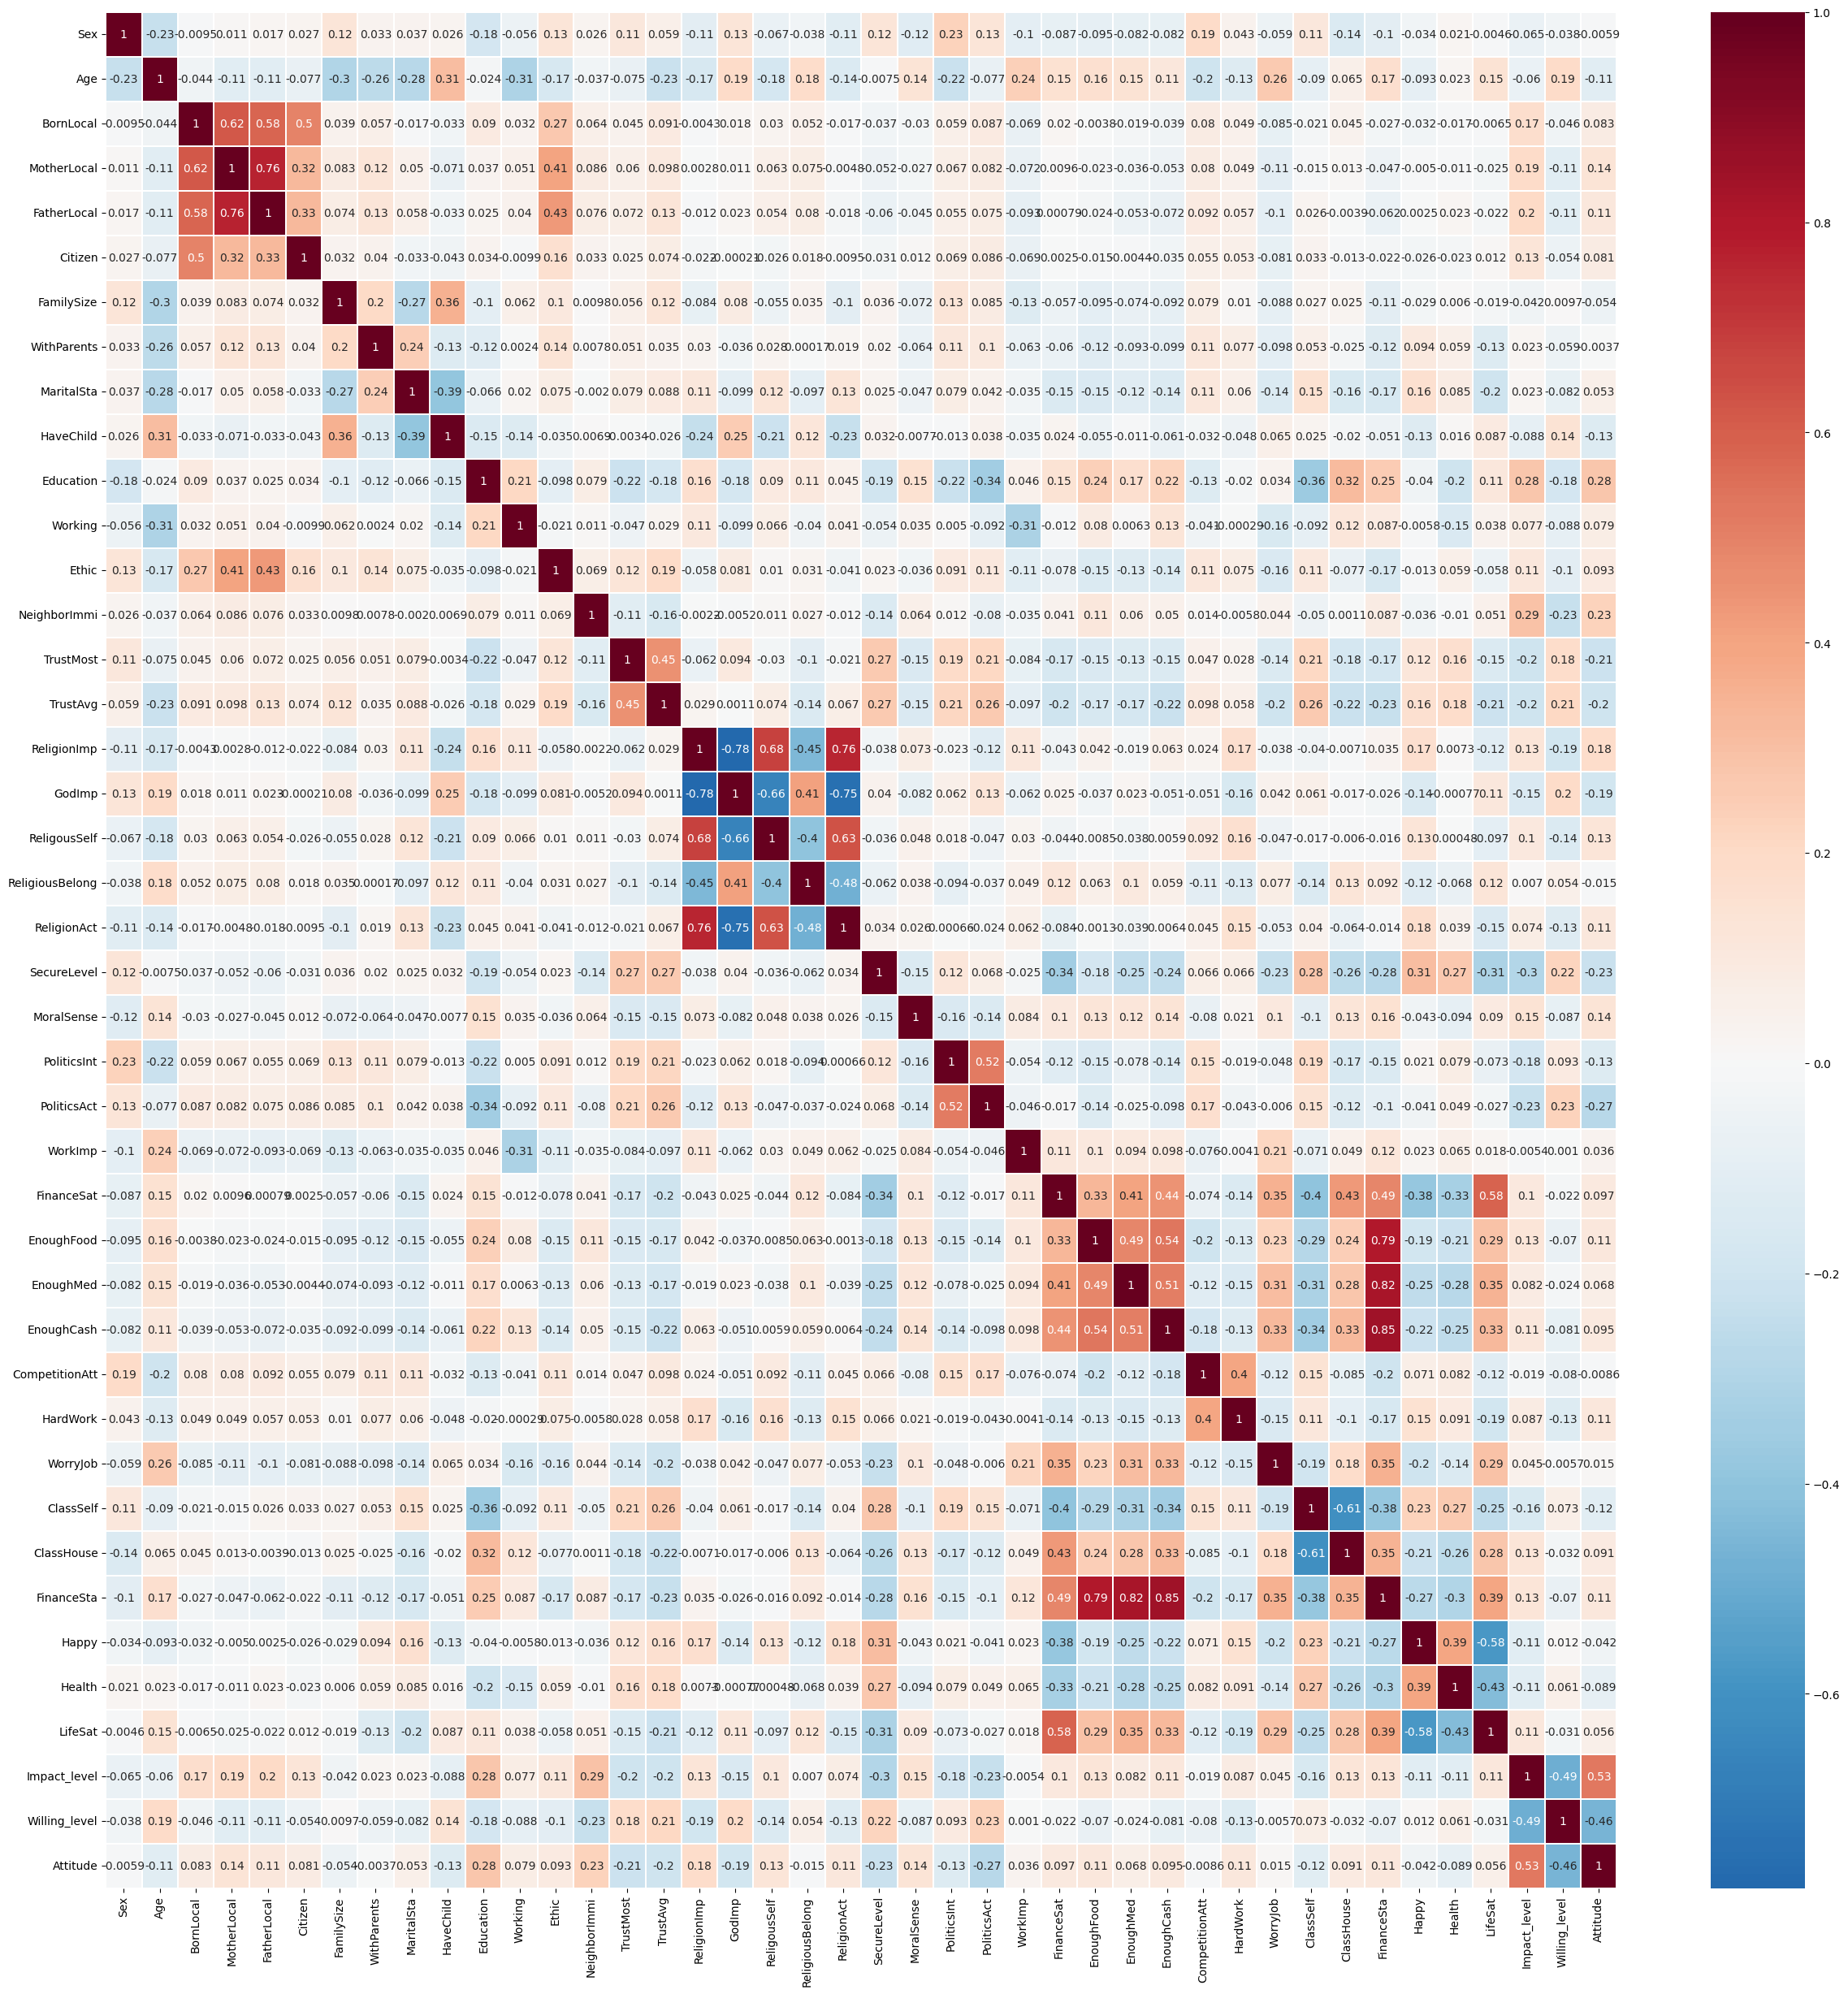

In [229]:
import seaborn as sns

# Calculate the Pearson correlation coefficient between the columns of the dataframe
corr = combine.corr()

# Visualize the correlation matrix as a heatmap
sns.set_context({"figure.figsize":(30,30)})
sns.heatmap(corr,annot=True,linewidths=0.3,cmap="RdBu_r",center=0)
# Show the plot
plt.show()

In [230]:
print(corr)


                      Sex       Age  BornLocal  MotherLocal  FatherLocal  \
Sex              1.000000 -0.227680  -0.009475     0.010952     0.016901   
Age             -0.227680  1.000000  -0.043602    -0.113375    -0.114104   
BornLocal       -0.009475 -0.043602   1.000000     0.616817     0.579094   
MotherLocal      0.010952 -0.113375   0.616817     1.000000     0.764327   
FatherLocal      0.016901 -0.114104   0.579094     0.764327     1.000000   
Citizen          0.027271 -0.076632   0.496116     0.316948     0.327278   
FamilySize       0.122377 -0.303777   0.039386     0.083163     0.074204   
WithParents      0.033305 -0.261725   0.056934     0.123367     0.131557   
MaritalSta       0.036666 -0.275226  -0.016998     0.049541     0.058181   
HaveChild        0.025742  0.308071  -0.033308    -0.070754    -0.033127   
Education       -0.180389 -0.023794   0.090427     0.037285     0.024595   
Working         -0.055664 -0.309338   0.031631     0.050559     0.039744   
Ethic       

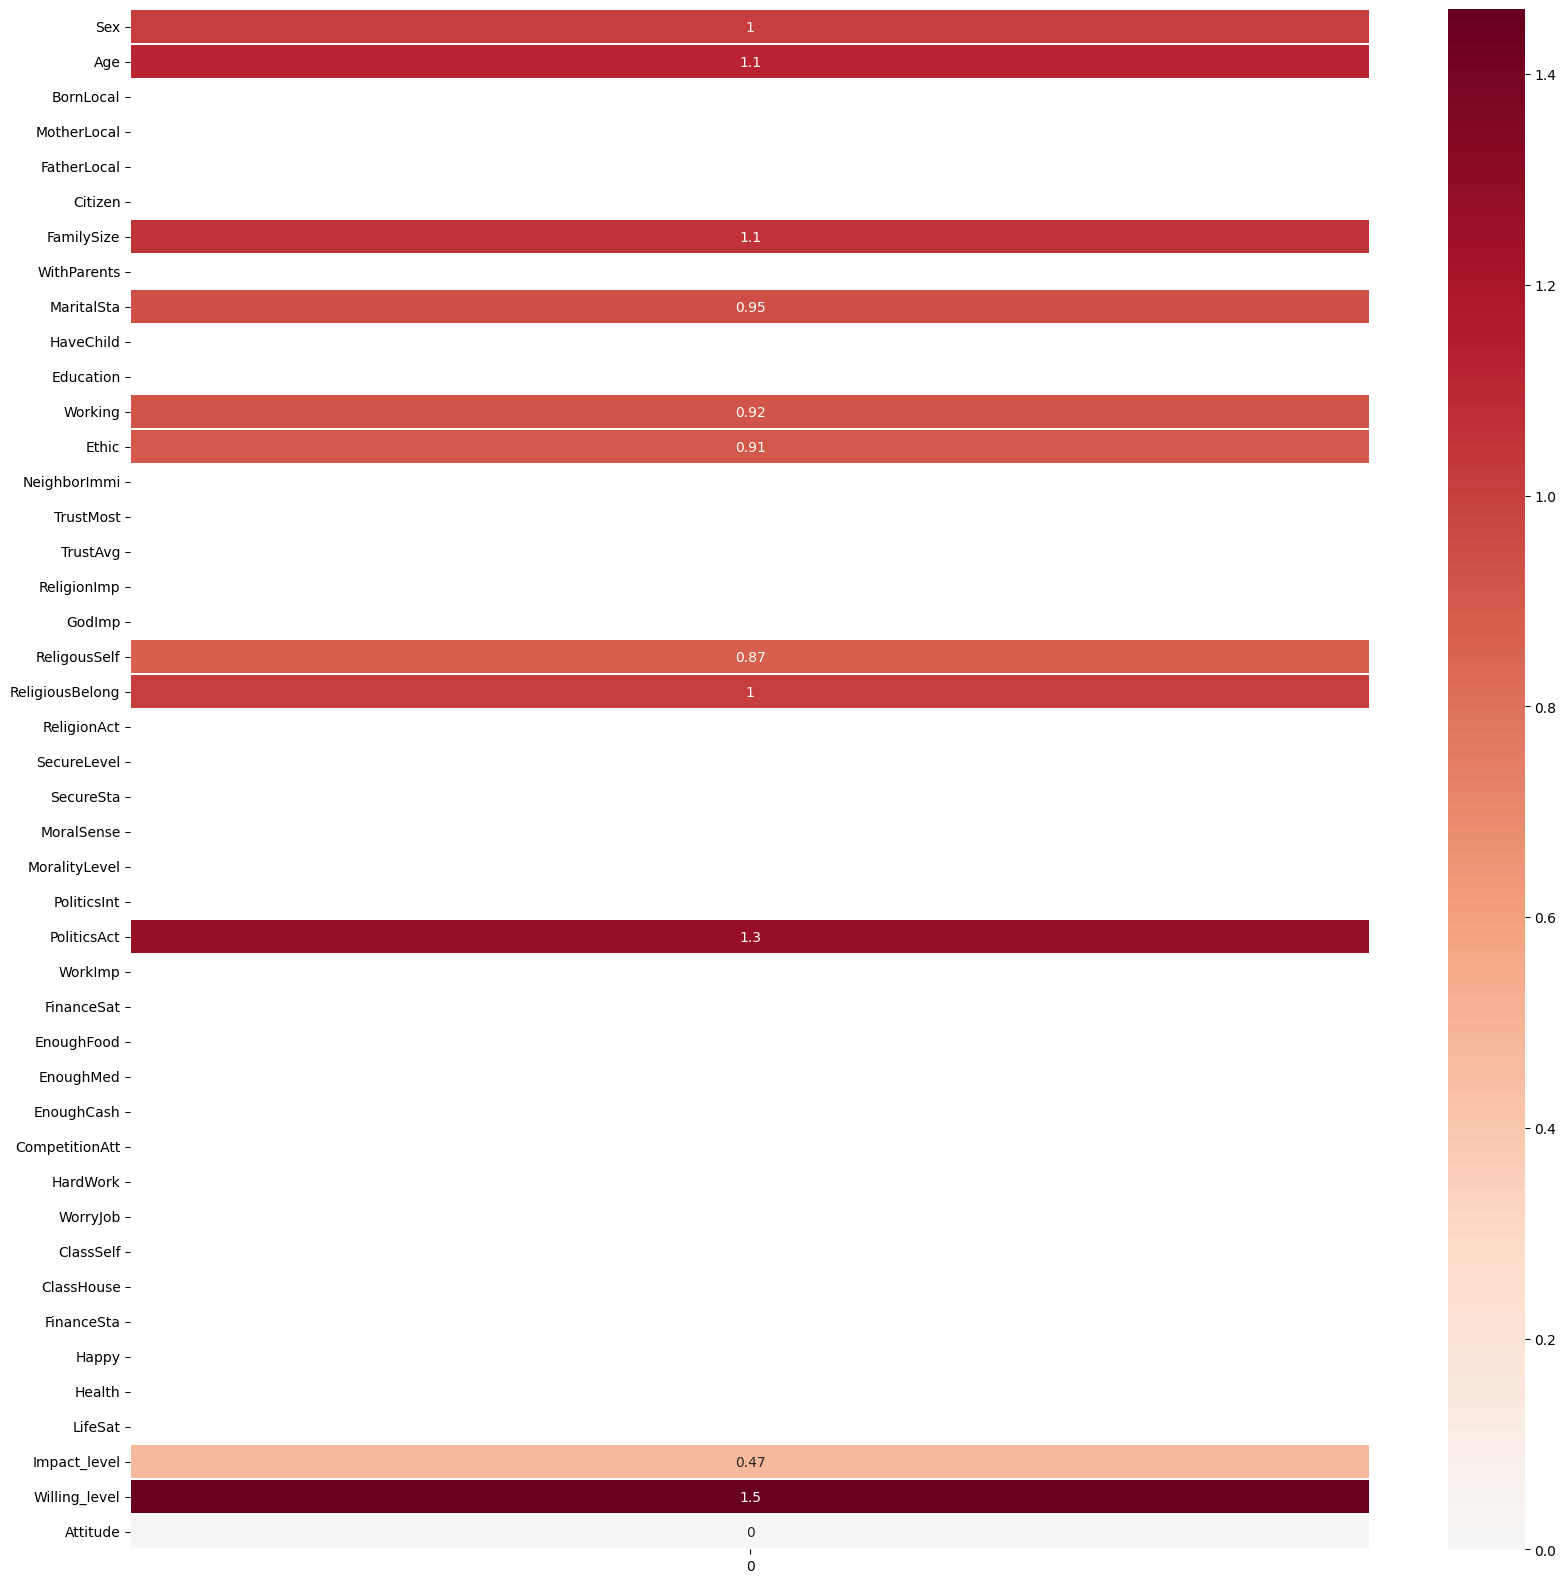

In [231]:
import distance
from scipy.spatial.distance import correlation

# Calculate the distance correlation between the columns of the dataframe
corr = combine.apply(lambda x: correlation(x, combine['Attitude']))

# Convert the "corr" Series object to a DataFrame object and reset the index
corr_df = corr.to_frame()

# Visualize the correlation matrix as a heatmap
sns.set_context({"figure.figsize":(20,20)})
sns.heatmap(data=corr_df,annot=True,linewidths=0.3,cmap="RdBu_r",center=0)

# Show the plot
plt.show()

In [232]:
from sklearn.impute import KNNImputer
# Convert the dataframe to a NumPy array
X = combine.values

# Create a KNNImputer object
imputer = KNNImputer(n_neighbors=40)

# Use the fit_transform() method to fill the missing values
X_filled = imputer.fit_transform(X)

# Convert the filled array back to a dataframe
df_filled = pd.DataFrame(X_filled, columns=combine.columns)

# Print the filled dataframe
df_filled

,Sex,Age,BornLocal,MotherLocal,FatherLocal,Citizen,FamilySize,WithParents,MaritalSta,HaveChild,Education,Working,Ethic,NeighborImmi,TrustMost,TrustAvg,ReligionImp,GodImp,ReligousSelf,ReligiousBelong,ReligionAct,SecureLevel,SecureSta,MoralSense,MoralityLevel,PoliticsInt,PoliticsAct,WorkImp,FinanceSat,EnoughFood,EnoughMed,EnoughCash,CompetitionAtt,HardWork,WorryJob,ClassSelf,ClassHouse,FinanceSta,Happy,Health,LifeSat,Impact_level,Willing_level,Attitude
0,2.0,66.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0,3.0,1.0,1.0,2.000,1.0,3.0,2.0,10.0,2.0,1.0,4.0,2.0,8.0,4.0,2.0,3.0,9.0,1.0,9.0,4.0,4.0,4.0,4.0,3.0,4.000,2.0,5.650,10.0,1.0,2.0,10.0,1.0,3.0,0.0
1,2.0,47.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,2.0,4.0,1.0,1.0,2.000,1.0,8.0,3.0,8.0,2.0,0.0,4.5,3.0,1.0,2.0,4.0,3.0,4.0,2.0,5.0,4.0,2.0,1.0,4.0,1.0,4.000,4.0,4.075,5.0,2.0,2.0,9.0,3.0,3.0,0.0
2,2.0,54.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0,3.0,1.0,1.0,1.900,1.0,5.0,1.0,10.0,1.0,1.0,3.5,2.0,5.0,3.0,2.0,3.0,4.0,1.0,10.0,4.0,4.0,4.0,5.0,3.0,4.000,4.0,6.000,10.0,2.0,2.0,8.0,3.0,3.0,0.0
3,1.0,63.0,1.0,1.0,1.0,1.0,2.0,1.0,3.0,3.0,4.0,1.0,1.0,2.000,1.0,5.0,4.0,3.0,1.0,0.0,7.5,2.0,7.0,4.0,3.0,2.0,3.0,2.0,5.0,4.0,4.0,2.0,3.0,7.0,3.000,3.0,4.000,8.0,2.0,1.0,7.0,3.0,3.0,0.0
4,1.0,60.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,7.0,1.0,1.0,1.925,2.0,6.0,1.0,10.0,1.0,0.0,1.0,3.0,5.0,4.0,1.0,2.0,3.0,2.0,4.0,2.0,2.0,4.0,1.0,4.0,2.000,3.0,4.000,6.0,2.0,2.0,8.0,4.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540,2.0,27.0,1.0,2.0,2.0,1.0,5.0,1.0,1.0,3.0,4.0,1.0,4.0,2.000,2.0,10.0,2.0,10.0,2.0,0.0,7.0,2.0,7.0,1.0,3.0,3.0,4.0,1.0,6.0,4.0,4.0,4.0,5.0,1.0,4.000,3.0,5.000,10.0,2.0,2.0,8.0,3.0,3.0,0.0
2541,2.0,43.0,1.0,1.0,1.0,1.0,3.0,1.0,3.0,1.0,3.0,1.0,4.0,2.000,2.0,5.0,4.0,1.0,2.0,0.0,7.5,3.0,4.0,10.0,4.0,1.0,1.0,2.0,7.0,4.0,1.0,4.0,5.0,5.0,1.000,4.0,5.325,7.0,2.0,2.0,9.0,4.0,2.0,1.0
2542,2.0,25.0,1.0,2.0,2.0,1.0,3.0,1.0,6.0,1.0,5.0,0.0,4.0,2.000,2.0,5.0,4.0,1.0,2.0,0.0,7.5,2.0,7.0,10.0,5.0,2.0,1.0,1.0,1.0,4.0,1.0,1.0,6.0,10.0,2.475,3.0,4.000,4.0,2.0,2.0,8.0,3.0,1.0,1.0
2543,1.0,59.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,2.0,6.0,1.0,4.0,2.000,2.0,5.0,3.0,2.0,1.0,0.0,7.0,2.0,7.0,4.0,4.0,3.0,2.0,2.0,6.0,4.0,4.0,4.0,4.0,1.0,4.000,3.0,4.000,10.0,2.0,2.0,9.0,5.0,2.0,1.0


In [233]:
df_filled.isnull().sum()

Sex                0
Age                0
BornLocal          0
MotherLocal        0
FatherLocal        0
Citizen            0
FamilySize         0
WithParents        0
MaritalSta         0
HaveChild          0
Education          0
Working            0
Ethic              0
NeighborImmi       0
TrustMost          0
TrustAvg           0
ReligionImp        0
GodImp             0
ReligousSelf       0
ReligiousBelong    0
ReligionAct        0
SecureLevel        0
SecureSta          0
MoralSense         0
MoralityLevel      0
PoliticsInt        0
PoliticsAct        0
WorkImp            0
FinanceSat         0
EnoughFood         0
EnoughMed          0
EnoughCash         0
CompetitionAtt     0
HardWork           0
WorryJob           0
ClassSelf          0
ClassHouse         0
FinanceSta         0
Happy              0
Health             0
LifeSat            0
Impact_level       0
Willing_level      0
Attitude           0
dtype: int64

In [234]:
df_filled.describe()

,Sex,Age,BornLocal,MotherLocal,FatherLocal,Citizen,FamilySize,WithParents,MaritalSta,HaveChild,Education,Working,Ethic,NeighborImmi,TrustMost,TrustAvg,ReligionImp,GodImp,ReligousSelf,ReligiousBelong,ReligionAct,SecureLevel,SecureSta,MoralSense,MoralityLevel,PoliticsInt,PoliticsAct,WorkImp,FinanceSat,EnoughFood,EnoughMed,EnoughCash,CompetitionAtt,HardWork,WorryJob,ClassSelf,ClassHouse,FinanceSta,Happy,Health,LifeSat,Impact_level,Willing_level,Attitude
count,2545.000000,2545.000000,2545.00000,2545.000000,2545.000000,2545.000000,2545.000000,2545.000000,2545.000000,2545.000000,2545.000000,2545.000000,2545.000000,2545.000000,2545.000000,2545.000000,2545.000000,2545.000000,2545.000000,2545.000000,2545.000000,2545.000000,2545.000000,2545.000000,2545.000000,2545.000000,2545.000000,2545.000000,2545.000000,2545.000000,2545.000000,2545.000000,2545.000000,2545.000000,2545.000000,2545.000000,2545.000000,2545.000000,2545.000000,2545.000000,2545.000000,2545.000000,2545.000000,2545.000000
mean,1.462475,43.472299,1.10669,1.155363,1.146640,1.033153,2.781532,1.114037,2.778389,1.522289,4.886022,0.667191,1.826326,1.912426,1.600138,6.437132,2.302338,6.699931,1.450295,0.537132,4.346596,2.260668,6.153360,5.589136,3.441660,2.202151,4.471906,1.864862,6.093821,3.606179,3.395953,3.360668,3.226375,3.777564,2.837908,3.059558,5.052868,8.362996,1.884509,2.099587,7.218959,3.374853,2.343811,0.531631
std,0.498688,16.319605,0.30537,0.348880,0.338634,0.178682,1.417896,0.359325,2.124747,1.585838,1.574146,0.471312,1.294831,0.276495,0.489875,2.130515,1.127925,3.455501,0.497621,0.498717,2.234137,0.710987,1.756592,2.792012,1.390771,0.909666,2.282026,0.847077,2.400193,0.764492,0.925352,0.969765,2.141206,2.539748,1.011467,0.933255,1.869125,2.182660,0.636707,0.827234,1.914206,0.969745,0.776564,0.499097
min,1.000000,18.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,30.000000,1.00000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,4.000000,0.000000,1.000000,2.000000,1.000000,5.000000,1.000000,4.000000,1.000000,0.000000,2.500000,2.000000,5.000000,3.000000,2.000000,2.000000,3.000000,1.000000,5.000000,3.150000,3.000000,3.000000,1.000000,1.000000,2.000000,2.000000,4.000000,7.000000,1.000000,2.000000,6.000000,3.000000,2.000000,0.000000
50%,1.000000,41.000000,1.00000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,2.000000,2.000000,6.000000,2.000000,8.000000,1.000000,1.000000,4.000000,2.000000,6.000000,5.000000,3.000000,2.000000,4.000000,2.000000,6.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,5.000000,10.000000,2.000000,2.000000,8.000000,3.000000,2.000000,1.000000
75%,2.000000,56.000000,1.00000,1.000000,1.000000,1.000000,4.000000,1.000000,6.000000,2.000000,6.000000,1.000000,3.000000,2.000000,2.000000,8.000000,3.000000,10.000000,2.000000,1.000000,6.537500,3.000000,8.000000,8.000000,4.000000,3.000000,6.000000,2.000000,8.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,6.000000,10.000000,2.000000,3.000000,9.000000,4.000000,3.000000,1.000000
max,2.000000,90.000000,2.00000,2.000000,2.000000,2.000000,6.000000,4.000000,6.000000,15.000000,8.000000,1.000000,5.000000,2.000000,2.000000,13.000000,4.000000,10.000000,2.000000,1.000000,7.500000,4.000000,8.000000,10.000000,10.000000,4.000000,10.000000,4.000000,10.000000,4.000000,4.000000,4.000000,10.000000,10.000000,4.000000,5.000000,10.000000,10.000000,4.000000,5.000000,10.000000,5.000000,4.000000,1.000000


In [235]:
from sklearn.model_selection import train_test_split
df1 = df_filled
# Extract the feature columns and target columns
X = df1.drop(['Attitude', 'Impact_level','Willing_level'], axis=1)
y_attitude = df1['Attitude']
y_impact = df1['Impact_level']
y_willing = df1['Willing_level']

# Split the data into training and test sets
X_train, X_test, y_attitude_train, y_attitude_test = train_test_split(X, y_attitude, test_size=0.2, random_state=42)
X_train, X_test, y_impact_train, y_impact_test = train_test_split(X, y_impact, test_size=0.2, random_state=42)
X_train, X_test, y_willing_train, y_willing_test = train_test_split(X, y_willing, test_size=0.2, random_state=42)

In [236]:
# Import the necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)

# Fit the model to the training data
knn.fit(X_train, y_attitude_train)

# Create a GaussianNB classifier
gnb = GaussianNB()

# Fit the model to the training data
gnb.fit(X_train, y_attitude_train)

# Create a logistic regression model
log_reg = LogisticRegression()

# Fit the model to the training data
log_reg.fit(X_train, y_attitude_train)

# Create an SVC model
svc = SVC()

# Fit the model to the training data
svc.fit(X_train, y_attitude_train)

# Create a decision tree classifier
dt = DecisionTreeClassifier()

# Fit the model to the training data
dt.fit(X_train, y_attitude_train)

# Create a random forest classifier
rf = RandomForestClassifier()

# Fit the model to the training data
rf.fit(X_train, y_attitude_train)

# Create an MLP classifier
mlp = MLPClassifier()

# Fit the model to the training data
mlp.fit(X_train, y_attitude_train)



/Users/zuoxu/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MLPClassifier()

In [237]:
# Import the necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Create a list of model names
model_names = ['KNN', 'GaussianNB', 'Logistic Regression', 'SVC', 'Decision Tree', 'Random Forest', 'MLP']

# Create a list of models
models = [knn, gnb, log_reg, svc, dt, rf, mlp]

# Create an empty list to store the evaluation scores
scores = []

# Iterate over the models
for model, name in zip(models, model_names):
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate the evaluation scores
    accuracy = accuracy_score(y_attitude_test, y_pred)
    f1 = f1_score(y_attitude_test, y_pred)
    recall = recall_score(y_attitude_test, y_pred)
    precision = precision_score(y_attitude_test, y_pred)
    roc_auc = roc_auc_score(y_attitude_test, y_pred)
    cv_scores = cross_val_score(model, X, y_attitude, cv=5)
    
   # Store the evaluation scores in the list
    scores.append({'Model': name, 'Metric': 'Accuracy', 'Score': accuracy})
    scores.append({'Model': name, 'Metric': 'F1 Score', 'Score': f1})
    scores.append({'Model': name, 'Metric': 'Recall', 'Score': recall})
    scores.append({'Model': name, 'Metric': 'Precision', 'Score': precision})
    scores.append({'Model': name, 'Metric': 'ROC AUC', 'Score': roc_auc})


# Convert the list to a Pandas dataframe
df_scores = pd.DataFrame(scores)




/Users/zuoxu/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zuoxu/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

In [238]:
# Import the necessary modules
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


# Build the ANN model for predicting Attitude
model_attitude = Sequential()
model_attitude.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model_attitude.add(Dense(1, activation='sigmoid'))


# Compile the model
model_attitude.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m])

# Train the model
model_attitude.fit(X_train, y_attitude_train, epochs=10, batch_size=32)


# Evaluate the model on the test data
loss, accuracy, f1_score, precision, recall = model_attitude.evaluate(X_test, y_attitude_test)




2022-12-21 23:08:42.379532: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10


2022-12-21 23:08:47.504124: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


64/64 [==============================] - 1s 1ms/step - loss: 1.0348 - accuracy: 0.5152 - f1_m: 0.5103 - precision_m: 0.5268 - recall_m: 0.5624
Epoch 2/10
64/64 [==============================] - 0s 1ms/step - loss: 0.7367 - accuracy: 0.5987 - f1_m: 0.6168 - precision_m: 0.6239 - recall_m: 0.6518
Epoch 3/10
64/64 [==============================] - 0s 1ms/step - loss: 0.6782 - accuracy: 0.6228 - f1_m: 0.6424 - precision_m: 0.6473 - recall_m: 0.6560
Epoch 4/10
64/64 [==============================] - 0s 1ms/step - loss: 0.6372 - accuracy: 0.6405 - f1_m: 0.6656 - precision_m: 0.6599 - recall_m: 0.6868
Epoch 5/10
64/64 [==============================] - 0s 1ms/step - loss: 0.6247 - accuracy: 0.6478 - f1_m: 0.6732 - precision_m: 0.6758 - recall_m: 0.6988
Epoch 6/10
64/64 [==============================] - 0s 1ms/step - loss: 0.6094 - accuracy: 0.6655 - f1_m: 0.6861 - precision_m: 0.6979 - recall_m: 0.7036
Epoch 7/10
64/64 [==============================] - 0s 2ms/step - loss: 0.5977 - accura

In [239]:
# Create a list of model names
model_names = ['ANN']

# Create an empty list to store the evaluation scores
scores = []

# Iterate over the models
for model, name in zip(models, model_names):
    # Evaluate the model on the test data
    loss, accuracy, f1_score, precision, recall = model_attitude.evaluate(X_test, y_attitude_test)
    # Store the evaluation scores in the list 
    scores.append({'Model': name, 'Metric': 'Accuracy', 'Score': accuracy})
    scores.append({'Model': name, 'Metric': 'F1 Score', 'Score': f1})
    scores.append({'Model': name, 'Metric': 'Recall', 'Score': recall})
    scores.append({'Model': name, 'Metric': 'Precision', 'Score': precision})
    # Convert the list to a Pandas dataframe
df_scores2 = pd.DataFrame(scores)

16/16 [==============================] - 0s 1ms/step - loss: 0.5555 - accuracy: 0.7171 - f1_m: 0.7099 - precision_m: 0.7122 - recall_m: 0.7163


In [240]:
df_scores = pd.concat([df_scores, df_scores2])

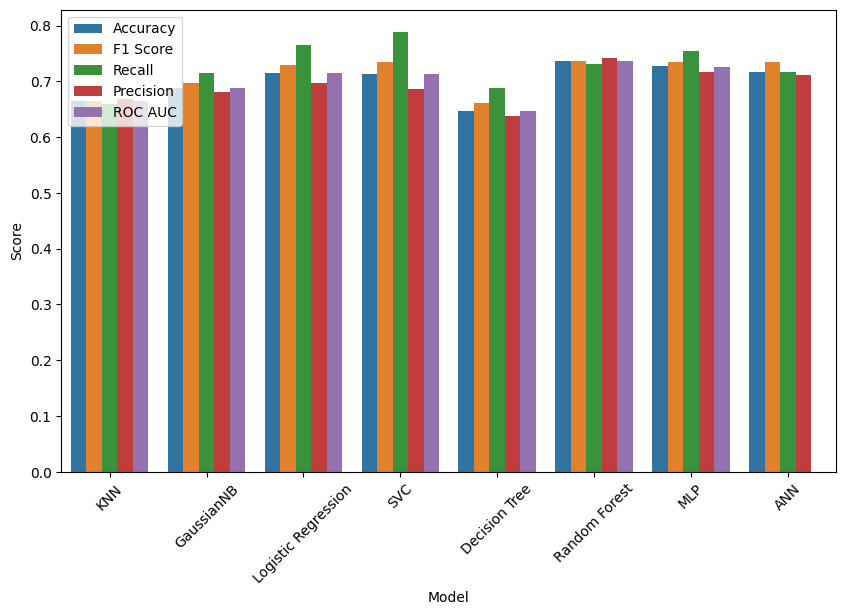

In [241]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot of the evaluation scores
sns.barplot(x='Model', y='Score', hue='Metric', data=df_scores)

# Set the x-axis labels
plt.xticks(rotation=45)

# Add a legend
plt.legend(loc='upper left')

# Show the plot
plt.show()


In [242]:
# Get the feature importance scores
importances = rf.feature_importances_

# Print the feature importance scores
print(importances)

[0.00922122 0.05454354 0.00723818 0.01732928 0.0124755  0.0028624
 0.02539996 0.00604285 0.0174423  0.02826796 0.05929781 0.00796395
 0.01908794 0.03303336 0.01845585 0.04449573 0.01883411 0.032972
 0.00833204 0.00859447 0.03658849 0.03855043 0.02960398 0.0388003
 0.03124429 0.02203102 0.06785196 0.01824045 0.03344624 0.01000938
 0.01204166 0.01278108 0.03256983 0.03697718 0.01888071 0.01872871
 0.02953833 0.01991178 0.01469242 0.01736896 0.02825232]


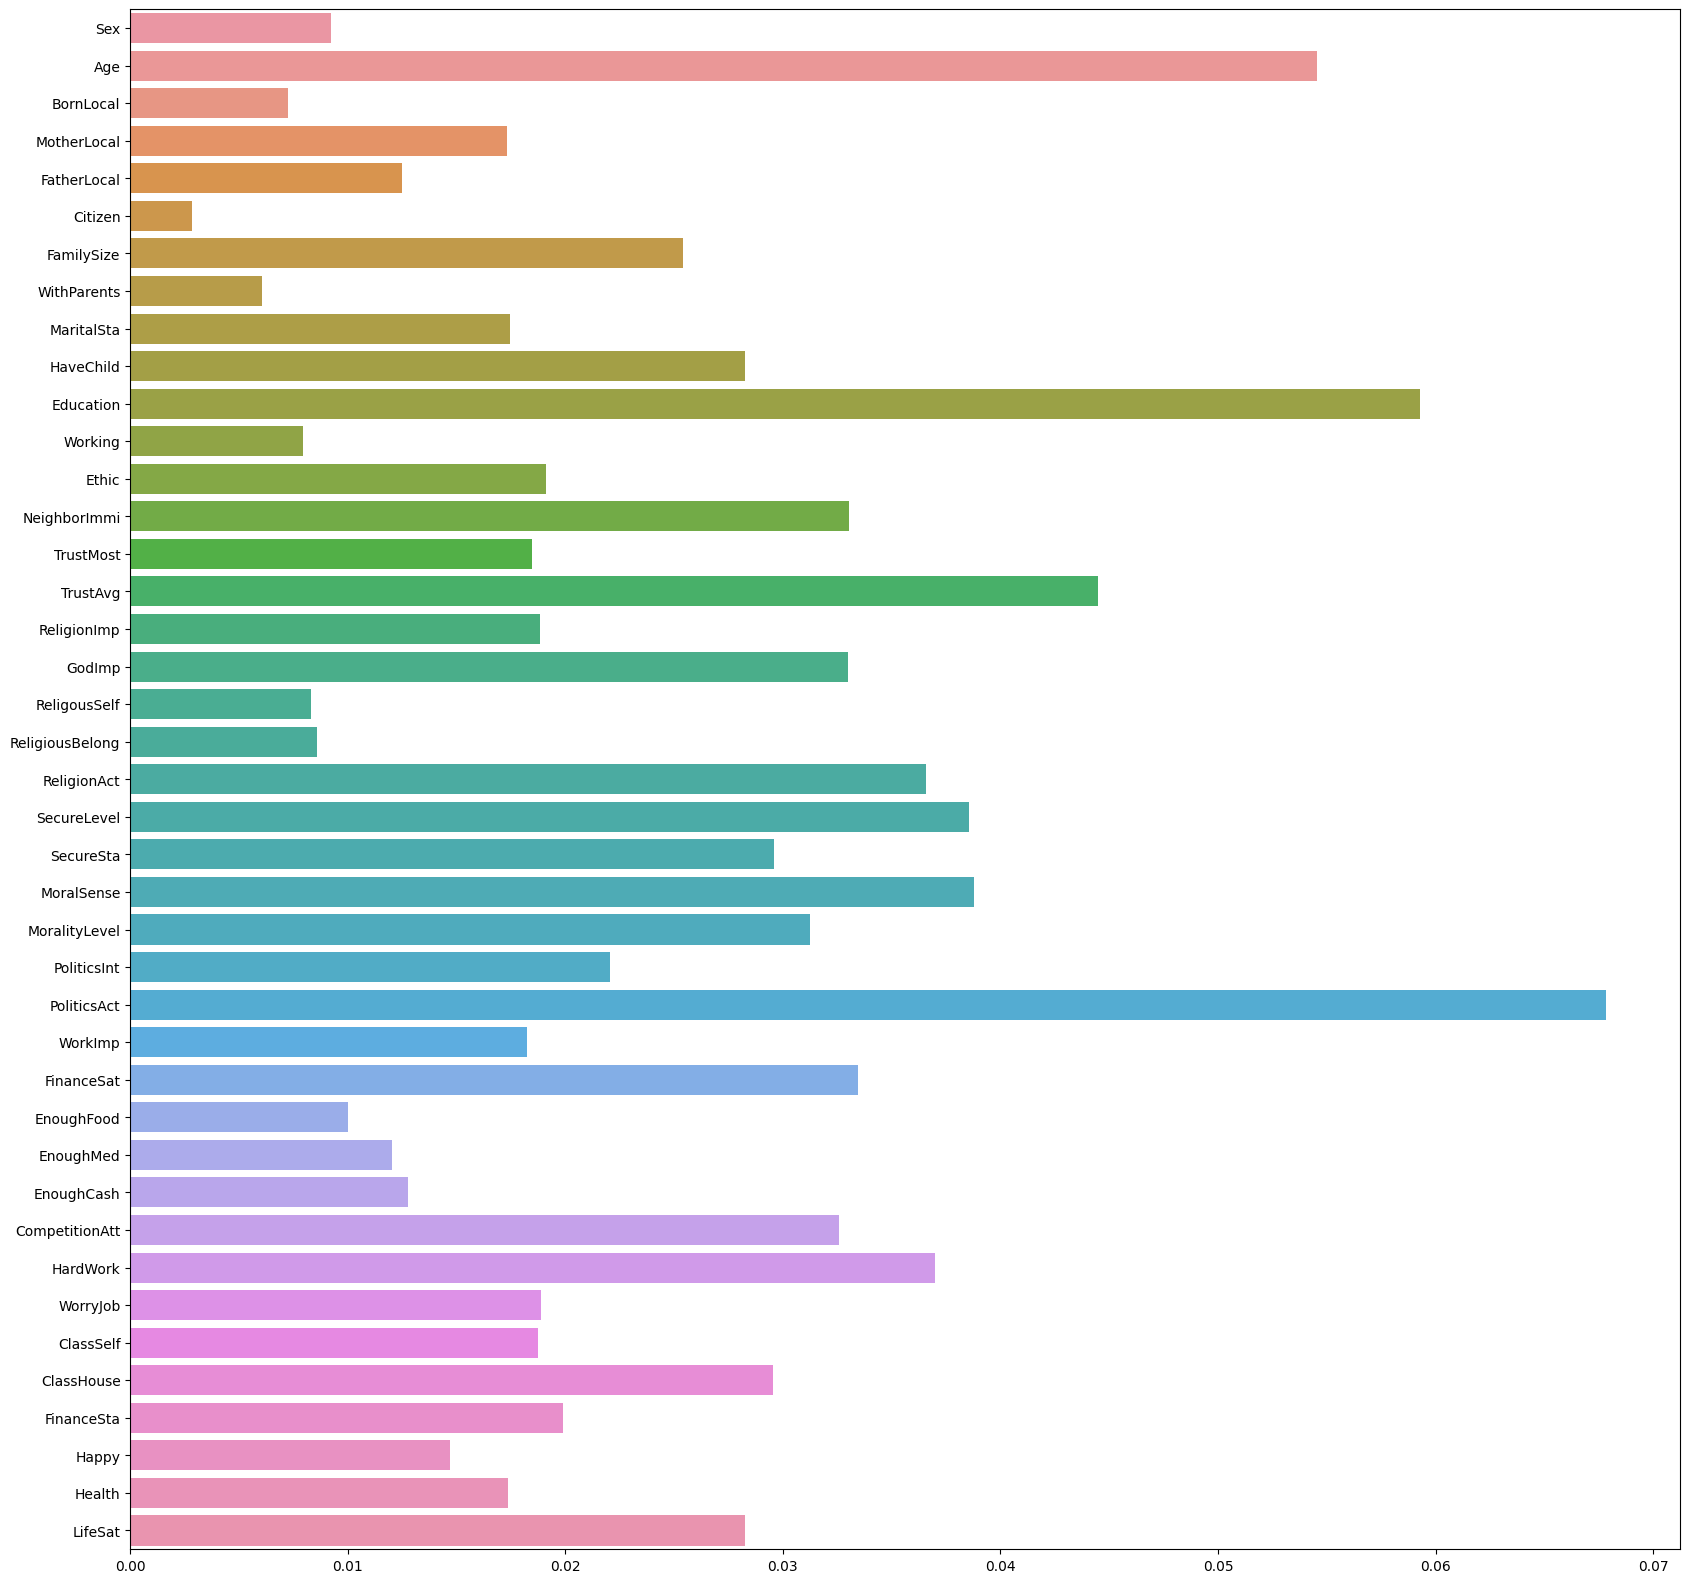

In [243]:
# Get the feature names
feature_names = list(X.columns)

# Create a bar plot of the feature importance scores
sns.barplot(x=importances, y=feature_names)

# Show the plot
plt.show()

In [182]:
# Import the necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

# Define the models
linear_reg = LinearRegression()
svm_reg = SVR()
tree_reg = DecisionTreeRegressor(random_state=42)
forest_reg = RandomForestRegressor(random_state=42)
mlp_reg = MLPRegressor(random_state=42)

# Fit the models to the training data
linear_reg.fit(X_train, y_impact_train)
svm_reg.fit(X_train, y_impact_train)
tree_reg.fit(X_train, y_impact_train)
forest_reg.fit(X_train, y_impact_train)
mlp_reg.fit(X_train, y_impact_train)




MLPRegressor(random_state=42)

In [183]:
y_impact_test.dtype

dtype('float64')

In [184]:
# Create a list of model names
model_names = ['LinearRegression', 'SVR', 'DecisionTreeRegressor', 'RandomForestRegressor', 'MLPRegressor']

# Create a list of models
models = [linear_reg, svm_reg, tree_reg, forest_reg, mlp_reg]

# Create an empty list to store the evaluation scores
scores = []

# Iterate over the models
for model, name in zip(models, model_names):
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate the evaluation scores
    mae = mean_absolute_error(y_impact_test, y_pred)
    rmse = mean_squared_error(y_impact_test, y_pred, squared=False)
    r2 = r2_score(y_impact_test, y_pred)
    cv_scores = cross_val_score(model, X, y_impact, cv=5)
    
   # Store the evaluation scores in the list
    scores.append({'Model': name, 'Metric': 'MAE', 'Score': mae})
    scores.append({'Model': name, 'Metric': 'RMSE', 'Score': rmse})
    scores.append({'Model': name, 'Metric': 'R2 Score', 'Score': r2})

# Convert the list to a Pandas dataframe
df_scores = pd.DataFrame(scores)




In [185]:
# Print the evaluation scores
print(df_scores)

                    Model    Metric     Score
0        LinearRegression       MAE  0.641829
1        LinearRegression      RMSE  0.766489
2        LinearRegression  R2 Score  0.026512
3                     SVR       MAE  0.648238
4                     SVR      RMSE  0.802511
5                     SVR  R2 Score -0.067138
6   DecisionTreeRegressor       MAE  0.837793
7   DecisionTreeRegressor      RMSE  1.122140
8   DecisionTreeRegressor  R2 Score -1.086472
9   RandomForestRegressor       MAE  0.643194
10  RandomForestRegressor      RMSE  0.771770
11  RandomForestRegressor  R2 Score  0.013053
12           MLPRegressor       MAE  0.687520
13           MLPRegressor      RMSE  0.849457
14           MLPRegressor  R2 Score -0.195643


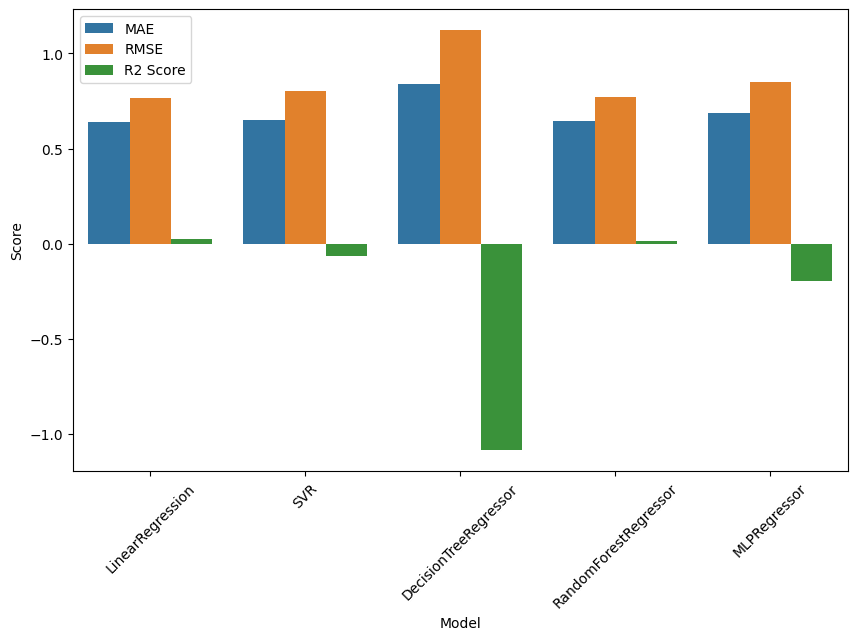

In [186]:
import seaborn as sns
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot of the evaluation scores
sns.barplot(x='Model', y='Score', hue='Metric', data=df_scores)

# Set the x-axis labels
plt.xticks(rotation=45)

# Add a legend
plt.legend(loc='upper left')

# Show the plot
plt.show()


In [209]:
model = Sequential()
model.add(Dense(32, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, y_impact_train, epochs=10, batch_size=32)

loss = model.evaluate(X_test, y_impact_test, return_dict=True)


from sklearn.metrics import mean_squared_error,r2_score

from math import sqrt

# Make predictions on the test data
y_impact_pred = model.predict(X_test)

# Calculate the MSE
mse = mean_squared_error(y_impact_test, y_impact_pred)

# Calculate the RMSE
rmse = sqrt(mse)

# Calculate the MSE
r2 = r2_score(y_impact_test, y_impact_pred)

print('MSE:', mse)
print('RMSE:', rmse)
print('R2:', r2)


Epoch 1/10
75/75 [==============================] - 0s 804us/step - loss: 16.3890
Epoch 2/10
75/75 [==============================] - 0s 824us/step - loss: 1.5654
Epoch 3/10
75/75 [==============================] - 0s 834us/step - loss: 1.2536
Epoch 4/10
75/75 [==============================] - 0s 855us/step - loss: 1.0889
Epoch 5/10
75/75 [==============================] - 0s 857us/step - loss: 1.0028
Epoch 6/10
75/75 [==============================] - 0s 869us/step - loss: 0.9327
Epoch 7/10
75/75 [==============================] - 0s 929us/step - loss: 0.8867
Epoch 8/10
75/75 [==============================] - 0s 897us/step - loss: 0.8595
Epoch 9/10
75/75 [==============================] - 0s 885us/step - loss: 0.8172
Epoch 10/10
19/19 [==============================] - 0s 783us/step
MSE: 0.805364254755794
RMSE: 0.897420890527847
R2: -0.33447695702677716


In [ ]:
#

In [289]:
df_cn

,version,doi,A_WAVE,A_YEAR,A_STUDY,B_COUNTRY,B_COUNTRY_ALPHA,C_COW_NUM,C_COW_ALPHA,D_INTERVIEW,J_INTDATE,FW_START,FW_END,K_TIME_START,K_TIME_END,K_DURATION,Q_MODE,N_REGION_ISO,N_REGION_WVS,N_TOWN,G_TOWNSIZE,G_TOWNSIZE2,H_SETTLEMENT,H_URBRURAL,I_PSU,O1_LONGITUDE,O2_LATITUDE,L_INTERVIEWER_NUMBER,S_INTLANGUAGE,LNGE_ISO,E_RESPINT,F_INTPRIVACY,E1_LITERACY,W_WEIGHT,S018,PWGHT,S025,S007,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q33_3,Q34,Q34_3,Q35,Q35_3,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60,Q61,Q62,Q63,Q64,Q65,Q66,Q67,Q68,Q69,Q70,Q71,Q72,Q73,Q74,Q75,Q76,Q77,Q78,Q79,Q80,Q81,Q82,Q82_AFRICANUNION,Q82_APEC,Q82_ARABLEAGUE,Q82_ASEAN,Q82_CIS,Q82_ECO,Q82_EU,Q82_GULFCOOP,Q82_ISLCOOP,Q82_MERCOSUR,Q82_NAFTA,Q82_OAS,Q82_SAARC,Q82_SCO,Q82_TLC,Q82_UNDP,Q83,Q84,Q85,Q86,Q87,Q88,Q89,Q90,Q91,Q92,Q93,Q94,Q95,Q96,Q97,Q98,Q99,Q100,Q101,Q102,Q103,Q104,Q105,Q106,Q107,Q108,Q109,Q110,Q111,Q112,Q113,Q114,Q115,Q116,Q117,Q118,Q119,Q120,Q121,Q122,Q123,Q124,Q125,Q126,Q127,Q128,Q129,Q130,Q131,Q132,Q133,Q134,Q135,Q136,Q137,Q138,Q139,Q140,Q141,Q142,Q143,Q144,Q145,Q146,Q147,Q148,Q149,Q150,Q151,Q152,Q153,Q154,Q155,Q156,Q157,Q158,Q159,Q160,Q161,Q162,Q163,Q164,Q165,Q166,Q167,Q168,Q169,Q170,Q171,Q172,Q173,Q174,Q175,Q176,Q177,Q178,Q179,Q180,Q181,Q182,Q183,Q184,Q185,Q186,Q187,Q188,Q189,Q190,Q191,Q192,Q193,Q194,Q195,Q196,Q197,Q198,Q199,Q200,Q201,Q202,Q203,Q204,Q205,Q206,Q207,Q208,Q209,Q210,Q211,Q212,Q213,Q214,Q215,Q216,Q217,Q218,Q219,Q220,Q221,Q222,Q223,Q223_ABREV,Q223_LOCAL,Q224,Q225,Q226,Q227,Q228,Q229,Q230,Q231,Q232,Q233,Q234,Q234A,Q234B,Q235,Q236,Q237,Q238,Q239,Q240,Q241,Q242,Q243,Q244,Q245,Q246,Q247,Q248,Q249,Q250,Q251,Q252,Q253,Q254,Q255,Q256,Q257,Q258,Q259,Q260,Q261,Q262,X003R,X003R2,Q263,Q264,Q265,Q266,Q267,Q268,Q269,Q270,Q271,Q272,Q273,Q274,Q275,Q275A,Q275R,Q276,Q276A,Q276R,Q277,Q277A,Q277R,Q278,Q278A,Q278R,Q279,Q280,Q281,Q282,Q283,Q284,Q285,Q286,Q287,Q288,Q288R,Q289,Q289CS9,Q290,Y001,Y002,Y003,SACSECVAL,RESEMAVAL,I_AUTHORITY,I_NATIONALISM,I_DEVOUT,DEFIANCE,I_RELIGIMP,I_RELIGBEL,I_RELIGPRAC,DISBELIEF,I_NORM1,I_NORM2,I_NORM3,RELATIVISM,I_TRUSTARMY,I_TRUSTPOLICE,I_TRUSTCOURTS,SCEPTICISM,I_INDEP,I_IMAGIN,I_NONOBED,AUTONOMY,I_WOMJOB,I_WOMPOL,I_WOMEDU,EQUALITY,I_HOMOLIB,I_ABORTLIB,I_DIVORLIB,CHOICE,I_VOICE1,I_VOICE2,I_VOI2_00,VOICE,SECVALWGT,RESEMAVALWGT,NAME,fhregion,polregfh,freestfh,prfhrat,prfhscore,clfhrat,clfhscore,democ,autoc,polity,durable,regtype,ruleoflaw,corrupttransp,electintegr,btiregion,btistatus,btidemstatus,btistate,btipolpart,btiruleoflaw,btistability,btiintegration,btimarket,btigovindex,btigoveperform,btiregime,regionWB,incomeWB,landWB,GDPpercap1,GDPpercap2,giniWB,incrichest10p,popWB1990,popWB2000,popWB2019,lifeexpect,popgrowth,urbanpop,laborforce,deathrate,unemployfem,unemploymale,unemploytotal,accessclfuel,accesselectr,renewelectr,co2emis,co2percap,easeofbusiness,militaryexp,Trade,healthexp,educationexp,medageun,meanschooling,educationHDI,compulseduc,GII,DGI,womenparl,hdi,incomeindexHDI,humanineqiality,lifeexpectHDI,homiciderate,Refugeesorigin,internetusers,mobphone,migrationrate,schoolgpi,femchoutsch,choutsch,v2x_polyarchy,v2x_libdem,v2x_partipdem,v2x_delibdem,v2x_egaldem,v2x_freexp_altinf,v2x_frassoc_thick,v2xel_frefair,v2xcl_rol,v2x_cspart,v2xeg_eqdr,v2excrptps,v2exthftps,v2juaccnt,v2cltrnslw,v2clacjust,v2clsocgrp,v2clacfree,v2clrelig,v2csrlgrep,v2mecenefm,v2mecenefi,v2mebias,v2pepwrses,v2pepwrgen,v2peedueq,v2pehealth,v2peapsecon,v2peasjsoecon,v2clgencl,v2peasjgen,v2peasbgen,v2cafres,v2cafexch,v2x_corr,v2x_gender,v2x_gencl,v2x_genpp,v2x_rule,v2xcl_acjst,ID_GPS,ID_PartyFacts,Partyname,Partyabb,CPARTY,CPARTYABB,Type_Values,Type_Populism,Type_Populist_Values,Type_Partysize_vote,Type_Partysize_seat,GPS_V4_Scale,GPS_V6_Scale,GPS_V8_Scale,GPS_V9,GPS_V10,GPS_V11,GPS_V12,GPS_V13,GPS_V14,GPS_V15,GPS_V16,GPS_V17,WVS_LR_PartyVoter,WVS_LibCon_PartyVoter,WVS_Polmistrust_PartyVoter,WVS_LR_MedianVoter,WVS_LibCon_MedianVot

In [246]:
df_cn['D_INTERVIEW'].describe()

count    3.036000e+03
mean     1.560715e+08
std      8.765620e+02
min      1.560700e+08
25%      1.560708e+08
50%      1.560715e+08
75%      1.560723e+08
max      1.560730e+08
Name: D_INTERVIEW, dtype: float64

In [290]:
for column in df_cn.columns:
    if df_cn[column].isna().mean() > 0.2:
        # The column has more than 20% missing values
        # Drop the column
        df_cn = df_cn.drop(column, axis=1)


In [291]:
for column in df_cn.columns:
    if df_cn[column].dtype == object:
        # The column is of data type string
        # Drop the column
        df_cn = df_cn.drop(column, axis=1)

In [292]:
for column in df_cn.columns:
    if df_cn[column].std() < 0.2:
        # The standard deviation is less than 0.2
        # Drop the column
        df_cn = df_cn.drop(column, axis=1)



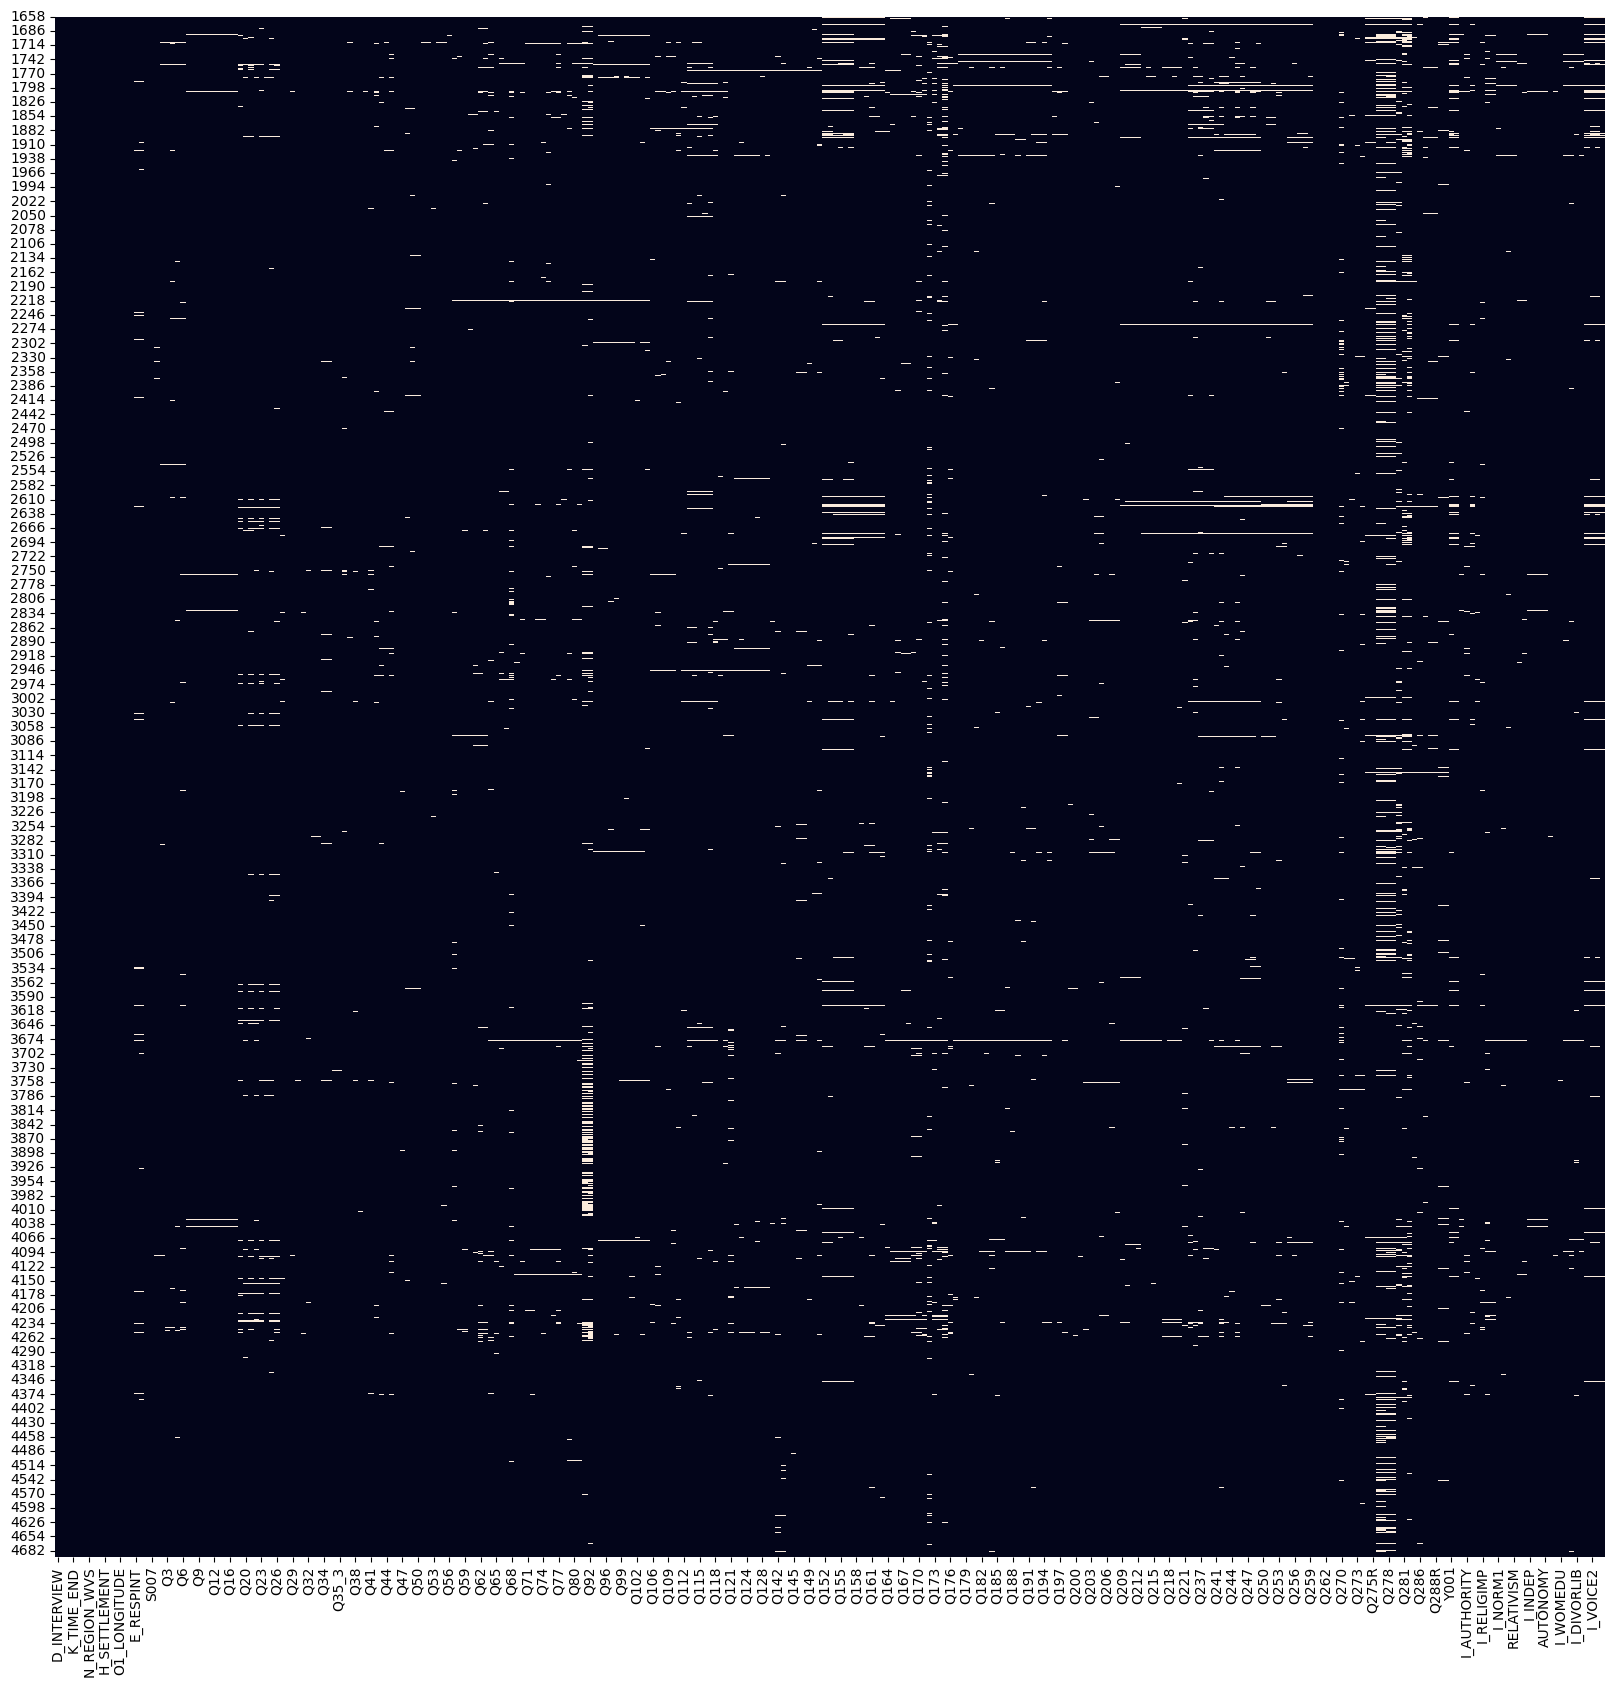

In [293]:
missing_values = df_cn.isnull()

# Create the heatmap
sns.heatmap(missing_values, cbar=False)
plt.show()

In [247]:
# Read in the data and compute the average of each column
column_averages = df_cn.mean()

# Fill missing values with the average of each column
df_cn = df_cn.fillna(column_averages)

In [284]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Extract the feature columns and target columns
X = df_cn.drop(['Q121'], axis=1)
y_impact = df_cn['Q121']

# Split the data into training and test sets
X_train, X_test, y_impact_train, y_impact_test = train_test_split(X, y_impact, test_size=0.2, random_state=42)

#Standar data
scaler = StandardScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Create a PCA object with 100 components
pca = PCA(n_components=100)

# Fit the PCA object to the data
pca.fit(X_train)


# Transform the data using the fitted PCA object
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)







In [285]:
# Define the models
linear_reg = LinearRegression()
svm_reg = SVR()
tree_reg = DecisionTreeRegressor(random_state=42)
forest_reg = RandomForestRegressor(random_state=42)
mlp_reg = MLPRegressor(random_state=42)

# Fit the models to the training data
linear_reg.fit(X_train, y_impact_train)
svm_reg.fit(X_train, y_impact_train)
tree_reg.fit(X_train, y_impact_train)
forest_reg.fit(X_train, y_impact_train)
mlp_reg.fit(X_train, y_impact_train)

MLPRegressor(random_state=42)

In [286]:
# Create a list of model names
model_names = ['LinearRegression', 'SVR', 'DecisionTreeRegressor', 'RandomForestRegressor', 'MLPRegressor']

# Create a list of models
models = [linear_reg, svm_reg, tree_reg, forest_reg, mlp_reg]

# Create an empty list to store the evaluation scores
scores = []

# Iterate over the models
for model, name in zip(models, model_names):
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate the evaluation scores
    mae = mean_absolute_error(y_impact_test, y_pred)
    rmse = mean_squared_error(y_impact_test, y_pred, squared=False)
    r2 = r2_score(y_impact_test, y_pred)
    cv_scores = cross_val_score(model, X, y_impact, cv=5)
    
   # Store the evaluation scores in the list
    scores.append({'Model': name, 'Metric': 'MAE', 'Score': mae})
    scores.append({'Model': name, 'Metric': 'RMSE', 'Score': rmse})
    scores.append({'Model': name, 'Metric': 'R2 Score', 'Score': r2})

# Convert the list to a Pandas dataframe
df_scores = pd.DataFrame(scores)




/Users/zuoxu/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/zuoxu/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/zuoxu/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/zuoxu/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/zuoxu/Lib

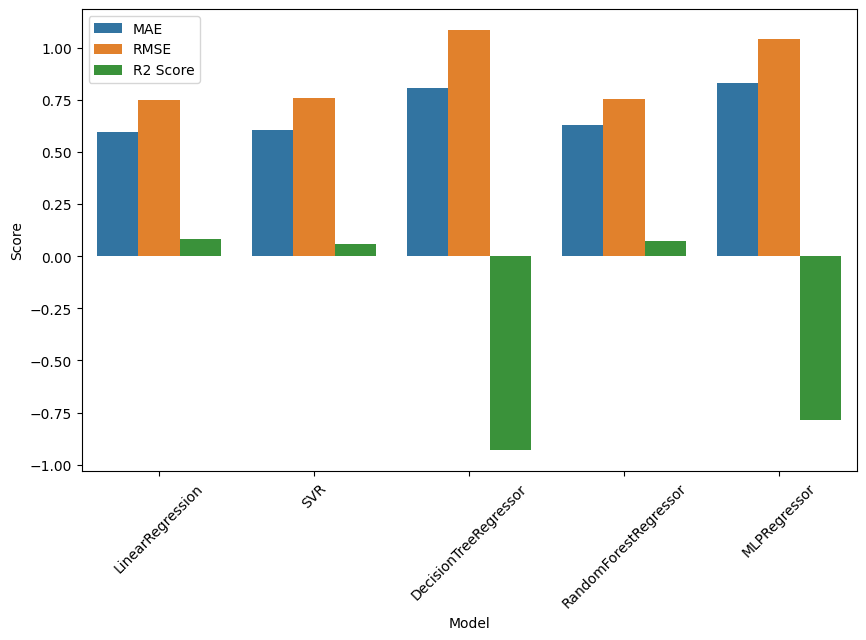

In [287]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot of the evaluation scores
sns.barplot(x='Model', y='Score', hue='Metric', data=df_scores)

# Set the x-axis labels
plt.xticks(rotation=45)

# Add a legend
plt.legend(loc='upper left')

# Show the plot
plt.show()


In [305]:
# Obtain the coefficients of the model
coefs = linear_reg.coef_

# Print the coefficients and importances
print("Coefficients:", coefs)


Coefficients: [-4.74485650e-03 -2.64244771e-02 -2.39610355e-02  3.55702387e-03
  3.34941449e-02 -3.80684660e-02  1.72339305e-02  1.92798725e-02
 -2.37223290e-02 -5.57718940e-03  7.91902912e-03 -1.58761117e-03
 -2.19261717e-02  6.32906439e-03 -2.33433326e-02  4.46923767e-02
  5.14072906e-02 -2.65006741e-03  3.37599344e-02  3.51751836e-02
 -1.27597636e-02 -7.49063211e-03 -2.23377183e-02  3.49894521e-02
  1.04320010e-02  1.33243553e-02 -2.68944678e-02  1.04797742e-02
 -2.67712568e-02  1.02693266e-02 -1.10864105e-03 -3.54171017e-03
 -2.99150704e-02 -3.98278734e-02 -3.06003453e-02  1.89802459e-02
 -2.20752273e-02 -4.22849766e-02 -7.53319255e-02  1.10816884e-02
  1.80420025e-02 -2.33017561e-02 -2.66750907e-02 -5.40551491e-02
  3.68257633e-03 -3.34664812e-02 -5.19894528e-02 -1.29530361e-02
  1.62369413e-02 -4.03560169e-02 -1.79720629e-02  2.70882729e-02
 -1.69124317e-03 -5.71312665e-03 -3.78714509e-02  3.15297117e-03
 -4.79968893e-02  1.73818312e-02 -3.24590667e-02 -9.21466629e-03
 -2.1086736